# **Heart Attack Risk Prediction and Model Interpretability Project**

# Introduction

This project was developed by Bora Eren ERDEM.

Heart disease is one of the most serious health problems of today, causing millions of deaths worldwide each year. So, what are the factors that increase the risk of a heart attack? Which variables play a critical role in reducing or increasing this risk? To answer these questions and examine these factors with a data-driven approach, I decided to work on the *Heart Attack Risk Dataset.*

The purpose of this project file is to synthesize the code and report presentations. Therefore, this file mainly contains the code related to the project. If you would like to view the report-focused presentation, you can access it here.

In this project, I aim to predict heart attack risks based on various health parameters of individuals. The dataset used includes many medical and physical characteristics such as age, cholesterol level, gender, and heart rate. (Detailed data descriptions will be provided in later sections.)

In the project, machine learning techniques are used to develop models that classify heart attack risk, and the performance of these models is evaluated. The stages of the project can be summarized as follows:

- __1 - Data Exploration and Preliminary Analysis:__ Examining the general structure of the dataset, identifying missing or erroneous data
- **2 - Data Preprocessing:** Cleaning, transforming, and scaling the data
- **3 - Model Creation and Training:** Training different machine learning algorithms
- **4 - Model Evaluation and Comparison:** Comparing models using performance metrics
- **5 - Model Interpretability:** Analyzing which variables have the most impact on heart attack risk
- **6 - Results and Recommendations:** Evaluating the findings from the modeling process and suggesting potential improvements (dataset and models)

In this report, I will discuss in detail how the models for heart attack risk prediction were developed and evaluated based on the steps outlined above.

# 1 - Data Exploration and Preliminary Analysis

- First, the dataset was loaded. A few rows were displayed, and the output was examined.

- The Heart Attack Risk Dataset used in this project was found to consist of 50000 rows and 20 columns (features).

- The features and their data types are as follows:
    - Age -> int
    - Gender -> object
    - Smoking -> int
    - Alcohol_Consumption -> int
    - Physical_Activity_Level -> object
    - BMI (Vücud Kitle İndeksi) -> float
    - Diabetes -> int
    - Hypertension -> int
    - Cholesterol_Level -> float
    - Resting_BP -> int
    - Heart_Rate -> int
    - Family_History -> int
    - Stress_Level -> object
    - Chest_Pain_Type -> object
    - Thalassemia -> object
    - Fasting_Blood_Sugar -> int
    - ECG_Results -> object
    - Exercise_Induced_Angina -> int
    - Max_Heart_Rate_Achieved -> int
    - Heart_Attack_Risk -> object

  
- All columns (features) are unique, meaning there are no repeating or duplicated columns (features).

- Then, the transpose of the numerical columns in the dataset was taken and analyzed in detail statistically.

- As a result of the analysis, it was determined that there are 13 numerical features and 7 categorical features.

- An analysis of missing, NaN, or erroneous data was performed on the dataset. As a result of the analysis, it was observed that there were no missing, NaN, or erroneous values in any of the features.

- Then, a check was performed to see if there were any duplicate rows in the dataset, and it was observed that no duplicate rows were found in any of the columns.

- To better understand the dataset, the frequency distribution of the variables in all columns was examined, and for this purpose, a histogram was created using the seaborn library and analyzed in detail.

- After all the information gathered, the target column was displayed in order to identify and analyze it.  -> According to the pie chart, there are 3 classes, and there is a notable imbalance among these classes.

- After this data, a dataframe named har_df_categorical was created for the categorical columns to analyze and visualize them more clearly. The class distributions were then observed in bar form by visualizing this dataframe using a countplot from the seaborn library.     -> It was observed that there is a significant class imbalance, especially in the target column 'Heart_Attack_Risk' and the 'Stress_Level' feature.

In [173]:
# Libraries used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix, make_scorer, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from collections import Counter
import missingno as msno # ıt was used to visualize the missing data
from scipy.stats import zscore, boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.ticker as mticker  # displaying decimal numbers in the graph

In [4]:
har_df = pd.read_csv('heart_attack_risk_dataset.csv')

In [5]:
har_df.head()

Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level    BMI  \
0   69  Female        1                    0                Moderate  34.61   
1   32    Male        0                    0                Moderate  22.75   
2   89    Male        0                    1                Moderate  35.32   
3   78    Male        0                    1                Moderate  18.23   
4   38  Female        1                    0                Moderate  19.82   

   Diabetes  Hypertension  Cholesterol_Level  Resting_BP  Heart_Rate  \
0         1             0              152.1         171          85   
1         0             0              166.8         126         103   
2         0             0              272.3         123         127   
3         1             0              237.7         144         125   
4         0             0              207.7         123         107   

   Family_History Stress_Level Chest_Pain_Type        Thalassemia  \
0               0     Moderate     Non-anginal  Reversible defect   
1               0          Low    Asymptomatic             Normal   
2               0          Low         Typical  Reversible defect   
3               0          Low         Typical       Fixed defect   
4               0         High    Asymptomatic  Reversible defect   

   Fasting_Blood_Sugar                   ECG_Results  Exercise_Induced_Angina  \
0                    0                        Normal                        0   
1                    0              ST-T abnormality                        0   
2                    0              ST-T abnormality                        0   
3                    1  Left Ventricular Hypertrophy                        0   
4                    0              ST-T abnormality                        0   

   Max_Heart_Rate_Achieved Heart_Attack_Risk  
0                      114               Low  
1                      173          Moderate  
2                      109               Low  
3                      129               Low  
4                      124          Moderate

In [11]:
har_df.dtypes # Data types of columns were checked

Age                          int64
Gender                      object
Smoking                      int64
Alcohol_Consumption          int64
Physical_Activity_Level     object
BMI                        float64
Diabetes                     int64
Hypertension                 int64
Cholesterol_Level          float64
Resting_BP                   int64
Heart_Rate                   int64
Family_History               int64
Stress_Level                object
Chest_Pain_Type             object
Thalassemia                 object
Fasting_Blood_Sugar          int64
ECG_Results                 object
Exercise_Induced_Angina      int64
Max_Heart_Rate_Achieved      int64
Heart_Attack_Risk           object
dtype: object

In [12]:
har_df.columns.unique().to_list() # Checked the columns that are unique (all are unique)

['Age',
 'Gender',
 'Smoking',
 'Alcohol_Consumption',
 'Physical_Activity_Level',
 'BMI',
 'Diabetes',
 'Hypertension',
 'Cholesterol_Level',
 'Resting_BP',
 'Heart_Rate',
 'Family_History',
 'Stress_Level',
 'Chest_Pain_Type',
 'Thalassemia',
 'Fasting_Blood_Sugar',
 'ECG_Results',
 'Exercise_Induced_Angina',
 'Max_Heart_Rate_Achieved',
 'Heart_Attack_Risk']

In [13]:
har_df.columns.value_counts().sum()

20

In [15]:
har_df.describe().T # The numeric columns in the data were examined in detail

count        mean        std    min     25%  \
Age                      50000.0   53.398700  20.799006   18.0   35.00   
Smoking                  50000.0    0.298420   0.457569    0.0    0.00   
Alcohol_Consumption      50000.0    0.401980   0.490303    0.0    0.00   
BMI                      50000.0   27.519357   7.225176   15.0   21.27   
Diabetes                 50000.0    0.198840   0.399131    0.0    0.00   
Hypertension             50000.0    0.297380   0.457110    0.0    0.00   
Cholesterol_Level        50000.0  225.036444  43.317373  150.0  187.30   
Resting_BP               50000.0  134.434100  25.907961   90.0  112.00   
Heart_Rate               50000.0   94.530480  20.187124   60.0   77.00   
Family_History           50000.0    0.300340   0.458410    0.0    0.00   
Fasting_Blood_Sugar      50000.0    0.149360   0.356447    0.0    0.00   
Exercise_Induced_Angina  50000.0    0.201640   0.401229    0.0    0.00   
Max_Heart_Rate_Achieved  50000.0  149.305340  28.823699  100.0  124.00   

                            50%     75%    max  
Age                       53.00   71.00   89.0  
Smoking                    0.00    1.00    1.0  
Alcohol_Consumption        0.00    1.00    1.0  
BMI                       27.54   33.77   40.0  
Diabetes                   0.00    0.00    1.0  
Hypertension               0.00    1.00    1.0  
Cholesterol_Level        225.10  262.60  300.0  
Resting_BP               134.00  157.00  179.0  
Heart_Rate                94.00  112.00  129.0  
Family_History             0.00    1.00    1.0  
Fasting_Blood_Sugar        0.00    0.00    1.0  
Exercise_Induced_Angina    0.00    0.00    1.0  
Max_Heart_Rate_Achieved  149.00  174.00  199.0

In [20]:
har_df.dtypes.value_counts() # It was observed that there are 13 numerical and 7 categorical columns (features)

int64      11
object      7
float64     2
Name: count, dtype: int64

In [21]:
har_df.isnull().sum() # Shows the number of NaN values in each column of the data. (no NaN values were observed in any column)

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

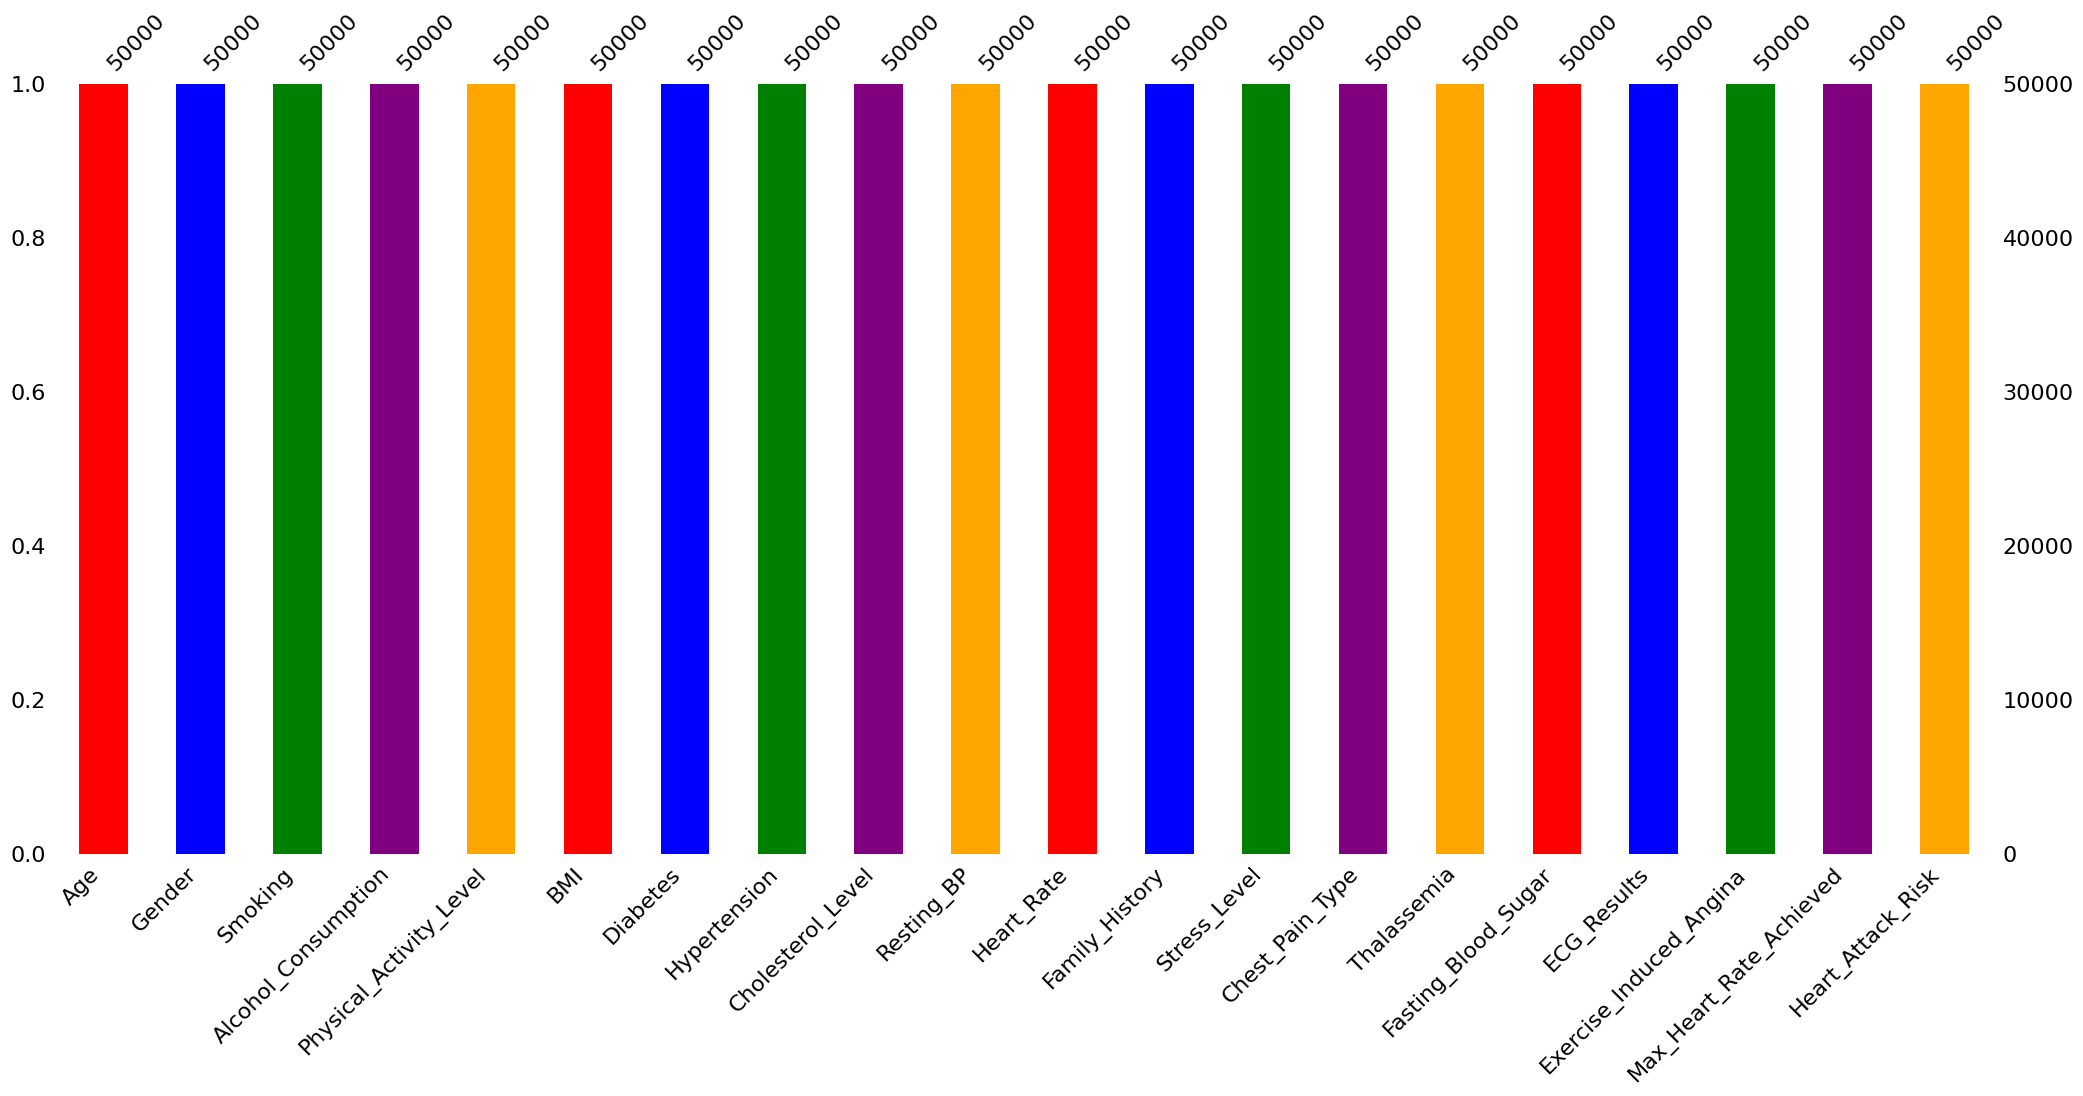

In [29]:
msno.bar(har_df, color=['red', 'blue', 'green', 'purple', 'orange'])
plt.show()

In [31]:
print(har_df[har_df.duplicated()].sum())  # Checked for duplicate rows (no duplicated rows found)

Age                          0
Gender                       0
Smoking                      0
Alcohol_Consumption          0
Physical_Activity_Level      0
BMI                        0.0
Diabetes                     0
Hypertension                 0
Cholesterol_Level          0.0
Resting_BP                   0
Heart_Rate                   0
Family_History               0
Stress_Level                 0
Chest_Pain_Type              0
Thalassemia                  0
Fasting_Blood_Sugar          0
ECG_Results                  0
Exercise_Induced_Angina      0
Max_Heart_Rate_Achieved      0
Heart_Attack_Risk            0
dtype: object


In [51]:
for i in har_df.columns: # Frequency distribution of all variables in the dataset
    print(har_df[i].value_counts())
    print("+++++++++++++")

Age
75    768
80    755
30    753
34    742
61    738
     ... 
48    650
81    649
51    644
87    642
37    640
Name: count, Length: 72, dtype: int64
+++++++++++++
Gender
Female    25086
Male      24914
Name: count, dtype: int64
+++++++++++++
Smoking
0    35079
1    14921
Name: count, dtype: int64
+++++++++++++
Alcohol_Consumption
0    29901
1    20099
Name: count, dtype: int64
+++++++++++++
Physical_Activity_Level
Low         20061
Moderate    19994
High         9945
Name: count, dtype: int64
+++++++++++++
BMI
16.06    37
29.29    35
19.81    35
36.91    35
32.33    35
         ..
37.41     8
20.72     8
33.12     8
40.00     7
37.26     6
Name: count, Length: 2501, dtype: int64
+++++++++++++
Diabetes
0    40058
1     9942
Name: count, dtype: int64
+++++++++++++
Hypertension
0    35131
1    14869
Name: count, dtype: int64
+++++++++++++
Cholesterol_Level
293.9    54
277.0    52
239.2    52
269.4    51
186.6    50
         ..
255.0    18
209.1    17
169.2    17
150.0    12
300.0    11

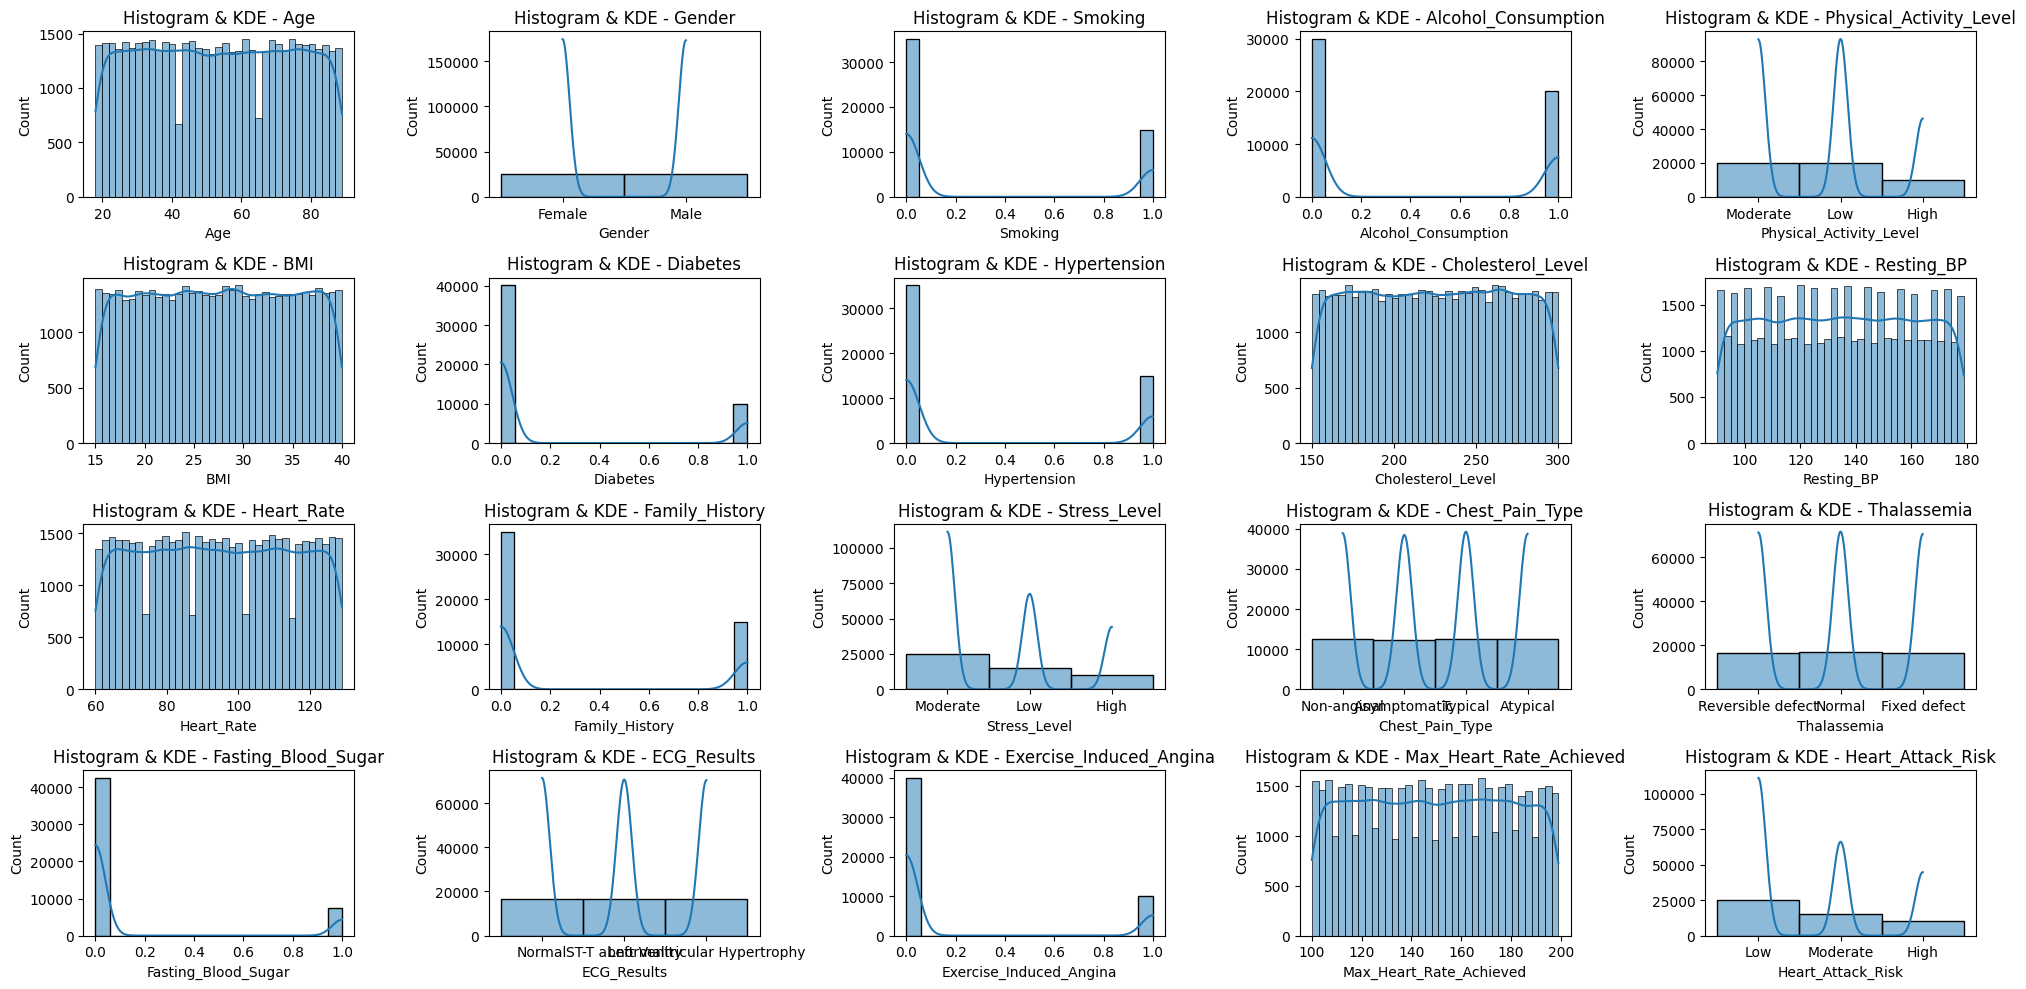

In [55]:
# Outlier detection was performed for all values in the dataset using histograms and KDE

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(har_df.columns):
    sns.histplot(har_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram & KDE - {col}')

plt.tight_layout()
plt.show()

In [32]:
har_df.select_dtypes('object').columns.to_list()

['Gender',
 'Physical_Activity_Level',
 'Stress_Level',
 'Chest_Pain_Type',
 'Thalassemia',
 'ECG_Results',
 'Heart_Attack_Risk']

In [33]:
har_df.columns[-1] # target column found

'Heart_Attack_Risk'

<Axes: ylabel='count'>

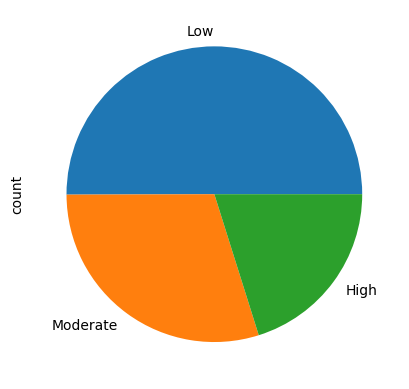

In [34]:
har_df['Heart_Attack_Risk'].value_counts().plot(kind='pie') # The target column was visualized for better analysis

In [36]:
har_df_categorical = har_df.select_dtypes(include=['object']) # dataframe was created to better visualize and analyze categorical columns
har_df_categorical.head()

Gender Physical_Activity_Level Stress_Level Chest_Pain_Type  \
0  Female                Moderate     Moderate     Non-anginal   
1    Male                Moderate          Low    Asymptomatic   
2    Male                Moderate          Low         Typical   
3    Male                Moderate          Low         Typical   
4  Female                Moderate         High    Asymptomatic   

         Thalassemia                   ECG_Results Heart_Attack_Risk  
0  Reversible defect                        Normal               Low  
1             Normal              ST-T abnormality          Moderate  
2  Reversible defect              ST-T abnormality               Low  
3       Fixed defect  Left Ventricular Hypertrophy               Low  
4  Reversible defect              ST-T abnormality          Moderate

In [37]:
for i in har_df_categorical.columns: # Frequency distribution of the variables in the categorical columns
    print(har_df_categorical[i].value_counts())
    print("----------")

Gender
Female    25086
Male      24914
Name: count, dtype: int64
----------
Physical_Activity_Level
Low         20061
Moderate    19994
High         9945
Name: count, dtype: int64
----------
Stress_Level
Moderate    24971
Low         15128
High         9901
Name: count, dtype: int64
----------
Chest_Pain_Type
Typical         12642
Non-anginal     12515
Atypical        12460
Asymptomatic    12383
Name: count, dtype: int64
----------
Thalassemia
Normal               16797
Reversible defect    16681
Fixed defect         16522
Name: count, dtype: int64
----------
ECG_Results
Normal                          16799
ST-T abnormality                16637
Left Ventricular Hypertrophy    16564
Name: count, dtype: int64
----------
Heart_Attack_Risk
Low         25024
Moderate    14904
High        10072
Name: count, dtype: int64
----------


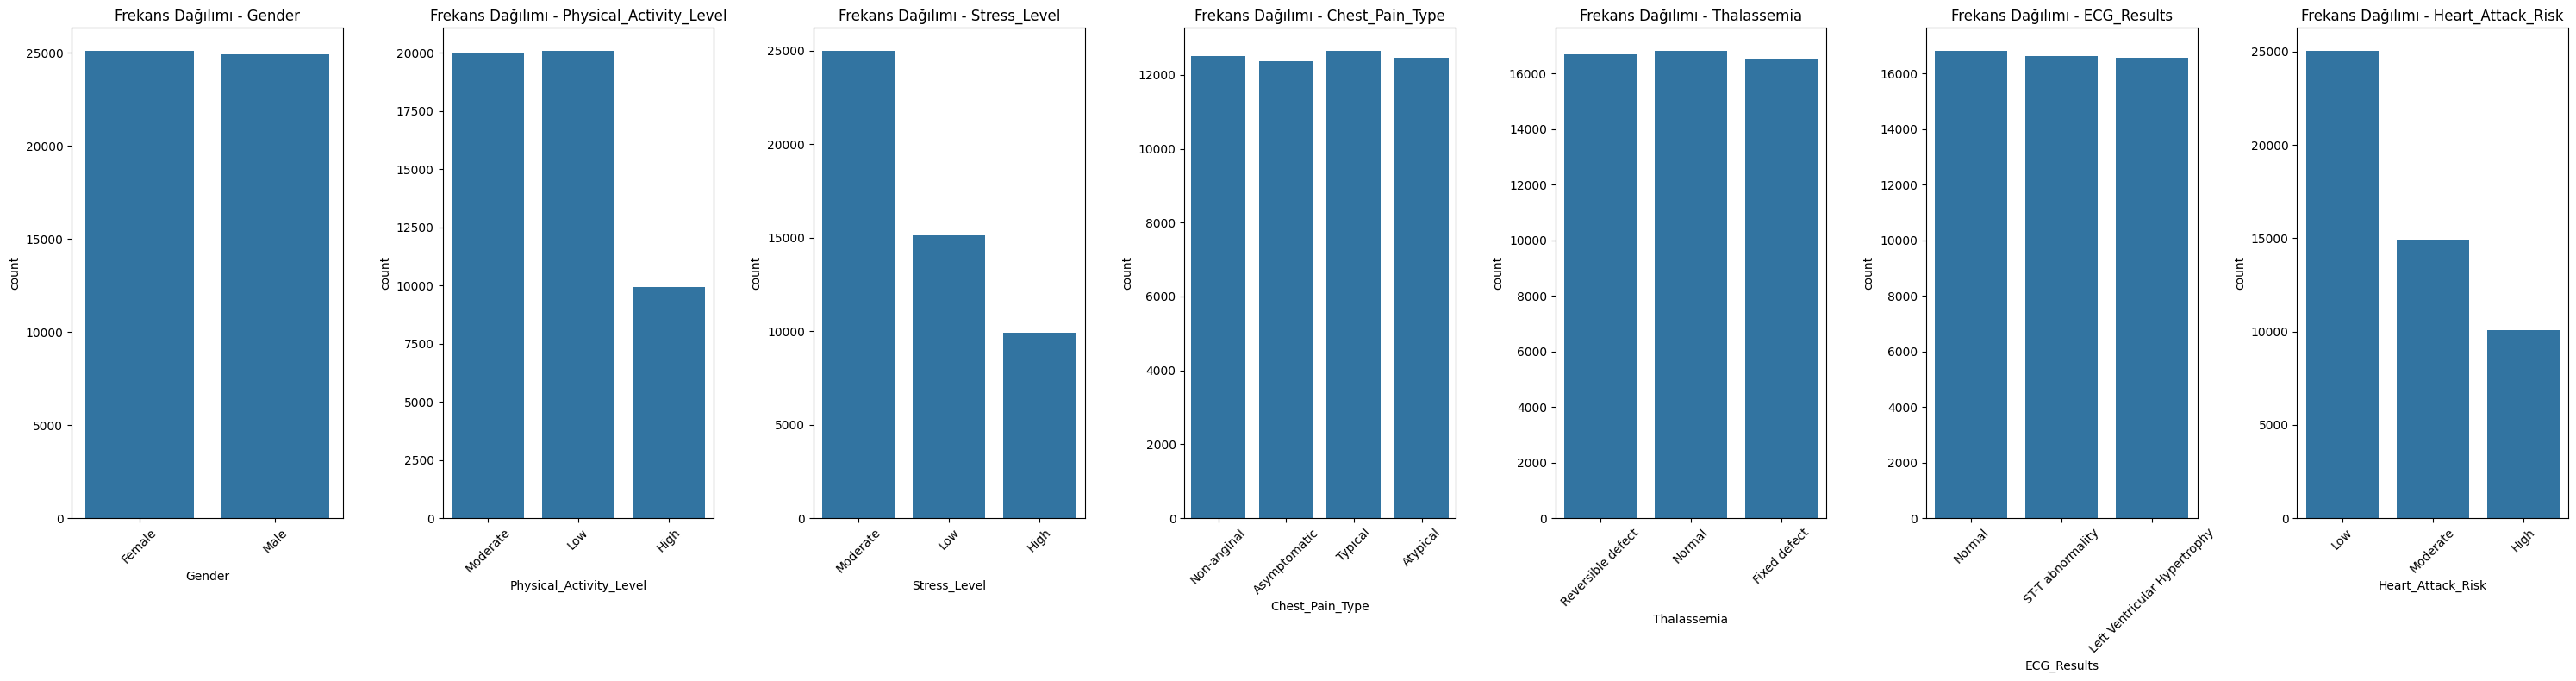

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30, 8))  # The frequency distribution of the categorical columns was visualized
axes = axes.flatten()  # 2D eksen dizisini 1D yap

for i, col in enumerate(har_df_categorical.columns):
    sns.countplot(x=har_df_categorical[col], ax=axes[i])
    axes[i].set_title(f"Frekans Dağılımı - {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2 - Data Preprocessing

- In this section, the categorical columns were converted to numerical columns using the *LabelEncoder()* from the preprocessing module of the sklearn library, and then the distribution of the variables was observed using *LabelEncoder().classes_*.

- As a result of this process, the distributions of the categorical column variables are shown as comments. However, for better clarity, the distribution of the variables after applying LabelEncoder is as follows:
    - Gender -> Female = 0   Male = 1
    - Physical_Activity_Level -> Low = 1   Moderate = 2   High = 0
    - Stress_Level -> High = 0   Low = 1   Moderate = 2
    - Chest_Pain_Type -> Asymptomatic = 0   Atypical = 1   Non-anginal = 2   Typical = 3
    - Thalassemia -> Fixed defect = 0   Normal = 1   Reversible defect = 2
    - ECG_Results -> Left Ventricular Hypertrophy = 0   Normal = 1   ST-T abnormality= 2
    - Heart_Attack_Risk -> High = 0   Low = 1   Moderate = 2   (Target Column)

- The distribution of the variables for the Target Column (Heart_Attack_Risk) was reviewed again using *value_counts()*. Then, the proportional distribution of the Target Column was observed using *value_counts(normalize=True)*.

- When the type of all columns was checked again using *dtypes*, it was observed that all columns were numerical columns.

- After this transformation in the dataset, all values were visualized using a boxplot from the seaborn library, and the outlier values and class distributions were observed.

- Now, it is possible to check whether there are any outlier values in the dataset. For this, the correlation between the features in the dataset is examined using *corr()*.

-  After examining all these values, the **Z score** method is applied to find out if there are any outlier values.

-  **Why did I choose the Z Score?**
    - It normalizes the data to have a mean of 0 and a standard deviation of 1, bringing it to the same scale. This way, outlier values in the data can be more easily detected.
    - Since it assumes the data follows a normal distribution, values greater than 3 can easily be observed as outliers.
    - Since the dataset is large, the Z Score calculates quickly and can be applied simultaneously to many features.

- Additionally, the IQR method was used to detect outlier values, but the IQR method was unsuccessful in interpreting the outliers in the data.

-  The maximum and minimum outlier values were observed for each column.

-  With the help of the previously visualized charts and analyses, outlier detection is performed on the entire dataset. Some columns show outlier values, but contrary to expectations, the outliers are in the minority, and in order not to reduce the diversity of the model, these values are not cleaned. Another interesting aspect is that when these outlier values are removed, the classification performance and metric values are significantly negatively impacted. Therefore, outlier values are kept in the dataset for diversity and performance reasons.

-  **Skewness**

-  After analyzing the outlier values, the skewness of the features in the dataset is examined and interpreted.

-  The skewness values of each numerical column in the dataset were calculated using *skew()* and analyzed.

-  To correct the skewness, focus was placed on positive values greater than 1 and negative values smaller than -1.

-  To make the skewness more evident and easier to examine, visualization was done using histplot() from the seaborn library.

- Three highly skewed features were identified, but no transformation was applied. This is because these features are in binary format, and it was anticipated that no transformation was necessary. It was also observed that when transformations were applied, the classes of these features got mixed up, significantly reducing performance. These features are: Diabetes, Fasting_Blood_Sugar, and Exercise_Induced_Angina.

- **Why was the transformation not applied?**

    - Initially, the *log1p()* skewness correction was applied to the columns with an absolute skewness value greater than 1 (Diabetes, Fasting_Blood_Sugar, Exercise_Induced_Angina). However, based on the results, log1p() was insufficient, and no improvement in the skewness values was observed.
    - Later, a more effective and powerful correction method, the Box-Cox transformation, was applied. What is interesting here is that after the Box-Cox transformation, the skewness of the skewed features (Diabetes, Fasting_Blood_Sugar, Exercise_Induced_Angina) dropped to nearly 0.00. This is actually the desired transformation for the dataset because it indicates that the data is now closer to a normal distribution (0.00). However, after applying the Box-Cox transformation, the transformed features can no longer differentiate between classes (0.00). It mixes the class boundaries and the data is distributed unevenly. (When oversampling techniques like ADASYN and SMOTE are applied, they are also not effective.) (Details can be found in later sections.)
    - The reason for this is that the skewed features are actually of binary data type, and the Box-Cox method tries to normalize the data too much in order to correct the skewness. As a result, the class distribution between the feature's class variables disappears, and the class distribution of the feature is distorted.

- After examining the details of all the features in the dataset and reviewing the observations, the correlation between the target column and the features was visualized, and a more detailed analysis was performed to determine which feature affected the target column the most, in descending order. Based on this graph, the most interesting finding about the dataset is that features like Diabetes, Hypertension, Fasting Blood Sugar, and Smoking have no correlation with heart attack risk. This is actually quite an unexpected result!

- After analyzing the features with the target column, a correlation heatmap was created to make the correlation between all the features clearer. Upon analyzing the heatmap, it was observed that there is low correlation between the features. In fact, low correlation between features is beneficial from a data perspective because it means more unique information is provided, which could enhance the model's ability to generalize.

- For detailed visualization, a pairplot was created using the seaborn library to perform a final and thorough examination of the dataset.

- The final version of the dataset was examined in detail, and the features were transposed for further analysis.

- In the final version of the dataset, the number of unique values for each feature was checked using the *nunique()* method.

- Since the data in the dataset has been analyzed both statistically and visually, we can now move on to creating the dependent and independent variables. (X, y)

- As mentioned at the beginning, the *Heart_Attack_Risk* column is selected as the target column. Then, the dependent and independent variables are created. (X = dependent, y = independent)

- The class distribution of the target column is checked using *Counter*.

- Before applying data balancing (sampling) to the dataset, the target column is visualized.

- -> As can be seen from this graph, there is class imbalance.

- The created X and y variables are split into stratified using *StratifiedShuffleSplit*.
- The dataset is split into 5 equal parts using the `n_splits=5` parameter.
- The data is shuffled randomly using the `shuffle=True` parameter. The reason for this is to improve the generalization of the model that will be created.

- **Why am I using StratifiedShuffleSplit?**

    - The data in the dataset is highly imbalanced, especially the number of positive scores is very low. (That's why there is no balanced class distribution.)
    - The reason for using *StratifiedShuffleSplit* instead of splitting just once with train_test_split is because it distributes the classes proportionally and preserves the class distributions.
    - Each class is proportionally represented in both the test and training sets. This allows for a more accurate model evaluation.
    - The reason for using *StratifiedShuffleSplit* instead of StratifiedKFold is that the dataset is very large, and StratifiedShuffleSplit is more successful in observing and optimizing the performance across different parts of the model.

**SMOTE**

- After splitting the dataset into strata using StratifiedShuffleSplit, it was observed that the data still had imbalanced distributions and inequalities between classes. To address this, *SMOTE, a data balancing (sampling) technique,* was used.

- **Why was SMOTE used?**

    - SMOTE was preferred because it generates synthetic samples equally, creates a balanced dataset, and, instead of copying the same data, it creates new synthetic examples, improving the class distribution.
        - The reason for using *sampling_strategy=auto* is that using other parameters resulted in more imbalanced synthetic sampling, which caused the class imbalance to persist, even if slightly. 
    - The reason ADASYN was not used is that the class imbalance in the target column is not at an extreme level (like 10:1). If ADASYN were used, it would generate more examples for the smaller class, potentially distorting the model. Additionally, since no significant improvements were observed at the class boundaries after applying ADASYN, it was not preferred.
    - The reason undersampling or oversampling was not used is due to potential information loss. With undersampling, data from the majority class would be removed, leading to significant information loss. With oversampling, duplicating the same data increases the likelihood of overfitting in the model.

- -> Normally, the target column with an imbalanced class distribution was balanced using SMOTE, eliminating the imbalanced class distribution.

**Scaling**

- Since there was a significant difference in measurements between variables in the dataset, scaling was applied. The MinMax Scaling, which is an efficient scaling approach for this dataset, was used.

- **Why was MinMax Scaling used?**

    - Since the features do not have many outlier values within themselves and are in different ranges, the most suitable scaling method, *MinMaxScaler()* was applied.
    - Standard Scaling was not applied because the features are not normally distributed..!

- Visualization of the target column after applying SMOTE to the dataset.

- As seen in the chart, the class imbalance has been significantly eliminated after applying SMOTE.

- The Data Preprocessing steps are now complete. We can now move on to the Model Creation and Training phase

In [62]:
# Categorical columns were transformed into numerical columns using LabelEncoder(), and the distributions of the variables were examined using LabelEncoder.classes_ (le.classes_)
le = LabelEncoder()
har_df['Gender'] = le.fit_transform(har_df['Gender']) # Female = 0, Male = 1
har_df['Gender']

har_df['Physical_Activity_Level'] = le.fit_transform(har_df['Physical_Activity_Level']) # Low = 1, Moderate = 2, High = 0
har_df['Physical_Activity_Level']

har_df['Stress_Level'] = le.fit_transform(har_df['Stress_Level']) # High = 0, Low = 1, Moderate = 2
har_df['Stress_Level']

har_df['Chest_Pain_Type'] = le.fit_transform(har_df['Chest_Pain_Type']) # Asymptomatic = 0, Atypical = 1, Non-anginal = 2, Typical = 3
har_df['Chest_Pain_Type']

har_df['Thalassemia'] = le.fit_transform(har_df['Thalassemia']) # Fixed defect = 0, Normal = 1, Reversible defect = 2
har_df['Thalassemia']

har_df['ECG_Results'] = le.fit_transform(har_df['ECG_Results']) # Left Ventricular Hypertrophy = 0, Normal = 1, ST-T abnormality= 2
har_df['ECG_Results']

har_df['Heart_Attack_Risk'] = le.fit_transform(har_df['Heart_Attack_Risk']) # Target Column   # High = 0, Low = 1, Moderate = 2
har_df['Heart_Attack_Risk']

0        1
1        2
2        1
3        1
4        2
        ..
49995    0
49996    2
49997    1
49998    2
49999    2
Name: Heart_Attack_Risk, Length: 50000, dtype: int32

In [63]:
har_df['Gender'].value_counts()

Gender
0    25086
1    24914
Name: count, dtype: int64

In [64]:
har_df['Physical_Activity_Level'].value_counts()

Physical_Activity_Level
1    20061
2    19994
0     9945
Name: count, dtype: int64

In [66]:
(le.classes_)

array(['High', 'Low', 'Moderate'], dtype=object)

In [67]:
har_df['Heart_Attack_Risk'].value_counts()

Heart_Attack_Risk
1    25024
2    14904
0    10072
Name: count, dtype: int64

In [69]:
har_df['Heart_Attack_Risk'].value_counts(normalize=True) # The proportional distribution of the target column

Heart_Attack_Risk
1    0.50048
2    0.29808
0    0.20144
Name: proportion, dtype: float64

In [71]:
har_df.dtypes # By examining the data types, it was determined whether all columns are numeric

Age                          int64
Gender                       int32
Smoking                      int64
Alcohol_Consumption          int64
Physical_Activity_Level      int32
BMI                        float64
Diabetes                     int64
Hypertension                 int64
Cholesterol_Level          float64
Resting_BP                   int64
Heart_Rate                   int64
Family_History               int64
Stress_Level                 int32
Chest_Pain_Type              int32
Thalassemia                  int32
Fasting_Blood_Sugar          int64
ECG_Results                  int32
Exercise_Induced_Angina      int64
Max_Heart_Rate_Achieved      int64
Heart_Attack_Risk            int32
dtype: object

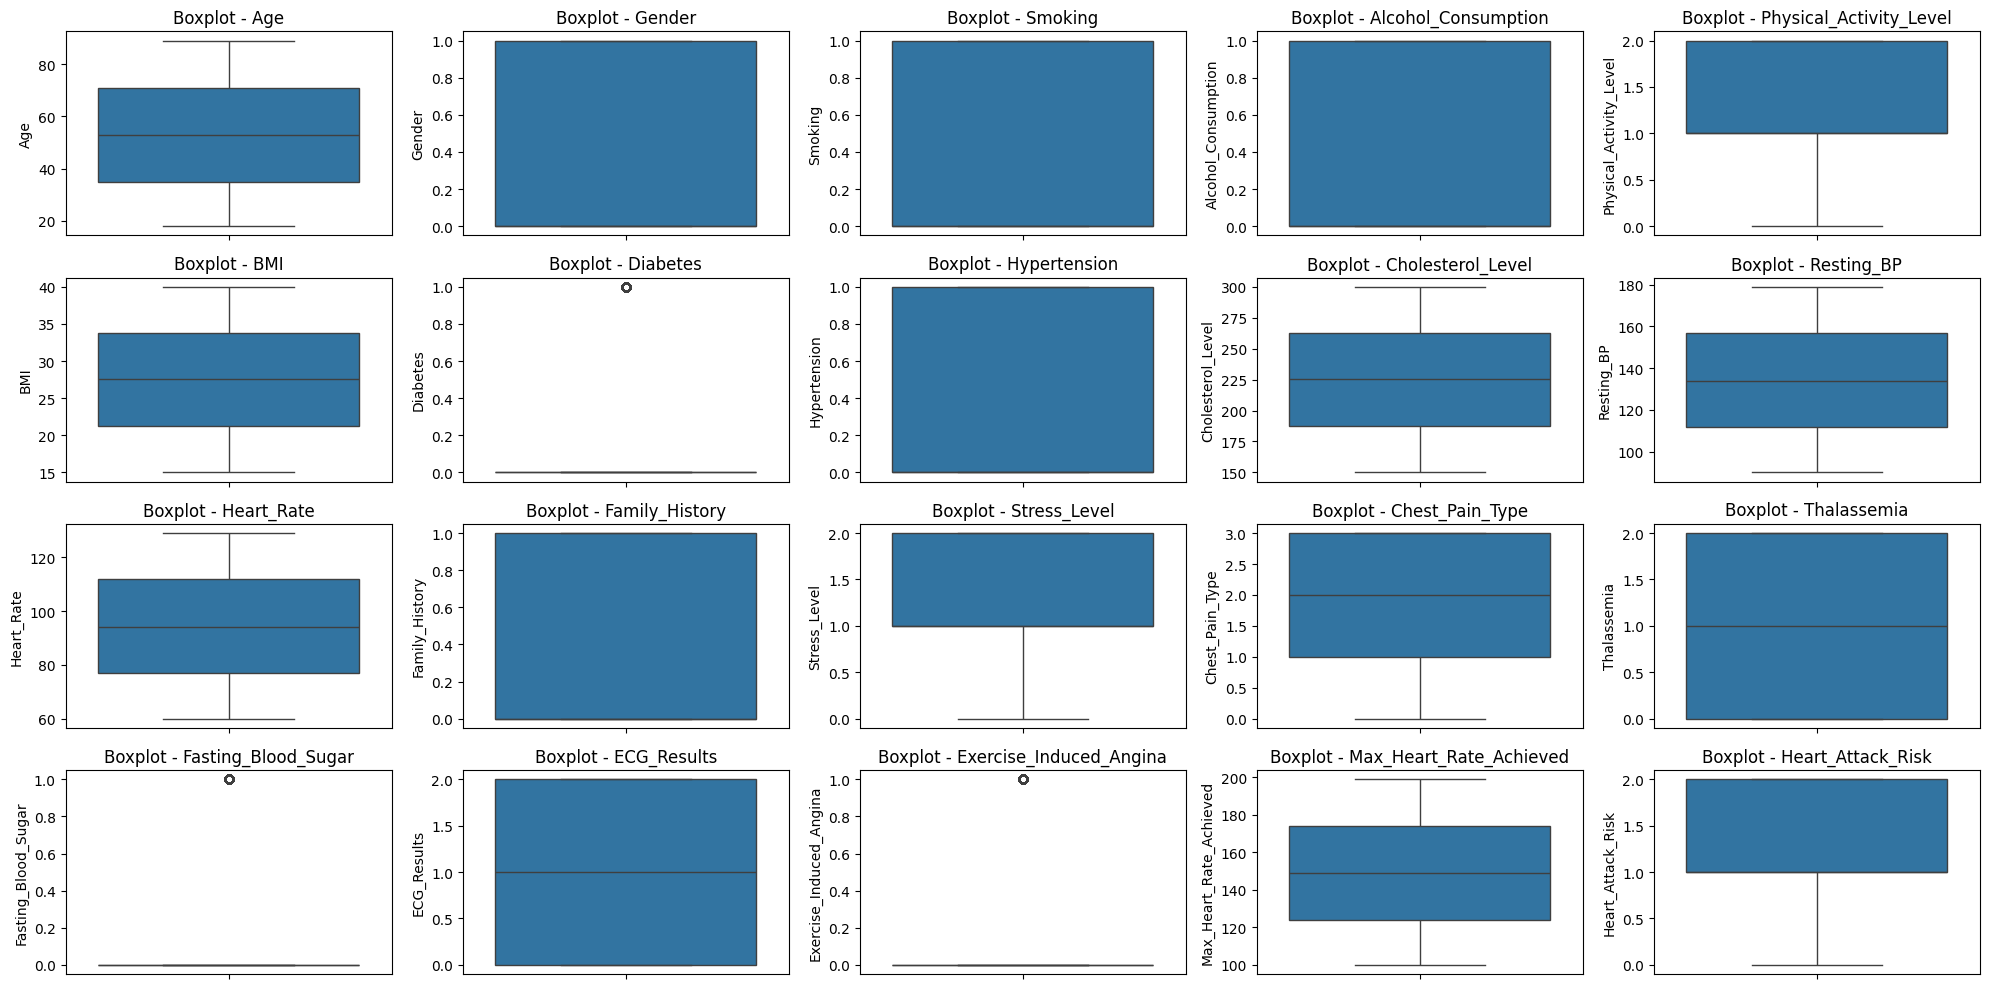

In [74]:
# After the transformation of the dataset, outlier detection was performed for all values using a boxplot

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(har_df.columns):
    sns.boxplot(har_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

In [78]:
har_df.corr()

Age    Gender   Smoking  Alcohol_Consumption  \
Age                      1.000000 -0.003514 -0.010123            -0.000250   
Gender                  -0.003514  1.000000  0.007270            -0.002768   
Smoking                 -0.010123  0.007270  1.000000             0.001877   
Alcohol_Consumption     -0.000250 -0.002768  0.001877             1.000000   
Physical_Activity_Level  0.001932  0.012247  0.007381             0.000027   
BMI                      0.006035  0.006171 -0.002649             0.000199   
Diabetes                -0.001944  0.000812 -0.003164            -0.001174   
Hypertension            -0.001635 -0.001394 -0.000689            -0.001342   
Cholesterol_Level       -0.000650  0.009317 -0.004103            -0.003098   
Resting_BP               0.003387 -0.004651 -0.004969             0.004930   
Heart_Rate              -0.004448 -0.002634 -0.004322             0.002849   
Family_History          -0.001106 -0.005643 -0.001561             0.001287   
Stress_Level             0.003926 -0.004472 -0.005567             0.003622   
Chest_Pain_Type         -0.000664  0.005784  0.002046             0.001542   
Thalassemia             -0.006925 -0.000011 -0.000829             0.003558   
Fasting_Blood_Sugar      0.000128  0.009297  0.001766            -0.001257   
ECG_Results              0.003594 -0.002326  0.001031            -0.004673   
Exercise_Induced_Angina  0.002802  0.001031  0.006028             0.002668   
Max_Heart_Rate_Achieved -0.007056  0.003898  0.005646             0.001785   
Heart_Attack_Risk       -0.001509 -0.001411 -0.002558            -0.000662   

                         Physical_Activity_Level       BMI  Diabetes  \
Age                                     0.001932  0.006035 -0.001944   
Gender                                  0.012247  0.006171  0.000812   
Smoking                                 0.007381 -0.002649 -0.003164   
Alcohol_Consumption                     0.000027  0.000199 -0.001174   
Physical_Activity_Level                 1.000000  0.003918  0.001667   
BMI                                     0.003918  1.000000 -0.000062   
Diabetes                                0.001667 -0.000062  1.000000   
Hypertension                           -0.000724  0.001564 -0.001157   
Cholesterol_Level                      -0.002010  0.005346  0.000933   
Resting_BP                              0.005217 -0.000864  0.007476   
Heart_Rate                             -0.000412 -0.009769  0.004813   
Family_History                         -0.002926 -0.001644  0.001751   
Stress_Level                           -0.010989  0.000380 -0.002350   
Chest_Pain_Type                         0.001816  0.003045 -0.004647   
Thalassemia                            -0.000491 -0.003712  0.000331   
Fasting_Blood_Sugar                     0.002935  0.002819 -0.006317   
ECG_Results                             0.005397 -0.003312  0.000460   
Exercise_Induced_Angina                 0.005985 -0.004930  0.006531   
Max_Heart_Rate_Achieved                 0.006603  0.005871 -0.001475   
Heart_Attack_Risk                      -0.001496  0.000498  0.003450   

                         Hypertension  Cholesterol_Level  Resting_BP  \
Age                         -0.001635          -0.000650    0.003387   
Gender                      -0.001394           0.009317   -0.004651   
Smoking                     -0.000689          -0.004103   -0.004969   
Alcohol_Consumption         -0.001342          -0.003098    0.004930   
Physical_Activity_Level     -0.000724          -0.002010    0.005217   
BMI                          0.001564           0.005346   -0.000864   
Diabetes                    -0.001157           0.000933    0.007476   
Hypertension                 1.000000          -0.003229   -0.005184   
Cholesterol_Level           -0.003229           1.000000   -0.008222   
Resting_BP                  -0.005184          -0.008222    1.000000   
Heart_Rate                  -0.002080          -0.003920   -0.003167   
Family_History

In [82]:
z_score = zscore(har_df) # Outlier values were identified by examining the Z Score
z_score.head()

Age    Gender   Smoking  Alcohol_Consumption  Physical_Activity_Level  \
0  0.750106 -0.996566  1.533291            -0.819869                 1.069276   
1 -1.028843  1.003446 -0.652192            -0.819869                 1.069276   
2  1.711700  1.003446 -0.652192             1.219707                 1.069276   
3  1.182823  1.003446 -0.652192             1.219707                 1.069276   
4 -0.740365 -0.996566  1.533291            -0.819869                 1.069276   

        BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
0  0.981390  2.007279     -0.650572          -1.683786    1.411391   
1 -0.660109 -0.498187     -0.650572          -1.344427   -0.325544   
2  1.079658 -0.498187     -0.650572           1.091110   -0.441340   
3 -1.285706  2.007279     -0.650572           0.292347    0.369230   
4 -1.065640 -0.498187     -0.650572          -0.400223   -0.441340   

   Heart_Rate  Family_History  Stress_Level  Chest_Pain_Type  Thalassemia  \
0   -0.472112       -0.655184      0.896970         0.439608     1.223253   
1    0.419555       -0.655184     -0.386984        -1.348580    -0.003902   
2    1.608443       -0.655184     -0.386984         1.333703     1.223253   
3    1.509369       -0.655184     -0.386984         1.333703    -1.231058   
4    0.617703       -0.655184     -1.670938        -1.348580     1.223253   

   Fasting_Blood_Sugar  ECG_Results  Exercise_Induced_Angina  \
0            -0.419029    -0.001792                -0.502561   
1            -0.419029     1.225394                -0.502561   
2            -0.419029     1.225394                -0.502561   
3             2.386469    -1.228977                -0.502561   
4            -0.419029     1.225394                -0.502561   

   Max_Heart_Rate_Achieved  Heart_Attack_Risk  
0                -1.224884          -0.138032  
1                 0.822063           1.290276  
2                -1.398354          -0.138032  
3                -0.704474          -0.138032  
4                -0.877944           1.290276

In [94]:
print(f'Max Outliers of Features\n {z_score.head().max()}\n')
print(f'///////////////////////////////////////\n')
print(f'Min Outliers of Features\n {z_score.head().min()}')

Max Outliers of Features
 Age                        1.711700
Gender                     1.003446
Smoking                    1.533291
Alcohol_Consumption        1.219707
Physical_Activity_Level    1.069276
BMI                        1.079658
Diabetes                   2.007279
Hypertension              -0.650572
Cholesterol_Level          1.091110
Resting_BP                 1.411391
Heart_Rate                 1.608443
Family_History            -0.655184
Stress_Level               0.896970
Chest_Pain_Type            1.333703
Thalassemia                1.223253
Fasting_Blood_Sugar        2.386469
ECG_Results                1.225394
Exercise_Induced_Angina   -0.502561
Max_Heart_Rate_Achieved    0.822063
Heart_Attack_Risk          1.290276
dtype: float64

///////////////////////////////////////

Min Outliers of Features
 Age                       -1.028843
Gender                    -0.996566
Smoking                   -0.652192
Alcohol_Consumption       -0.819869
Physical_Activity_Level    

In [95]:
# Look At Outlier Values (no outlier value)   
outlier_columns = har_df[['Diabetes', 'Fasting_Blood_Sugar', 'Exercise_Induced_Angina']]
outlier_columns.head()

Diabetes  Fasting_Blood_Sugar  Exercise_Induced_Angina
0         1                    0                        0
1         0                    0                        0
2         0                    0                        0
3         1                    1                        0
4         0                    0                        0

In [97]:
z_score_outlier_columns = zscore(outlier_columns)
z_score_outlier_columns.head()

Diabetes  Fasting_Blood_Sugar  Exercise_Induced_Angina
0  2.007279            -0.419029                -0.502561
1 -0.498187            -0.419029                -0.502561
2 -0.498187            -0.419029                -0.502561
3  2.007279             2.386469                -0.502561
4 -0.498187            -0.419029                -0.502561

In [98]:
outliers = zscore(abs(z_score_outlier_columns) > 3)
outlier_rows = outlier_columns[outliers.any(axis=1)]
print(outlier_rows)

Empty DataFrame
Columns: [Diabetes, Fasting_Blood_Sugar, Exercise_Induced_Angina]
Index: []


In [105]:
har_df_outlier_zscores = zscore(har_df)
har_df_outlier_zscores
outliers_zscores = (abs(har_df_outlier_zscores) > 3)
outliers_zscores
outliers_zscores.value_counts()

Age    Gender  Smoking  Alcohol_Consumption  Physical_Activity_Level  BMI    Diabetes  Hypertension  Cholesterol_Level  Resting_BP  Heart_Rate  Family_History  Stress_Level  Chest_Pain_Type  Thalassemia  Fasting_Blood_Sugar  ECG_Results  Exercise_Induced_Angina  Max_Heart_Rate_Achieved  Heart_Attack_Risk
False  False   False    False                False                    False  False     False         False              False       False       False           False         False            False        False                False        False                    False                    False                50000
Name: count, dtype: int64

In [106]:
outliers_zscores_rows = har_df[outliers_zscores.any(axis=1)]
print(outliers_zscores_rows)

Empty DataFrame
Columns: [Age, Gender, Smoking, Alcohol_Consumption, Physical_Activity_Level, BMI, Diabetes, Hypertension, Cholesterol_Level, Resting_BP, Heart_Rate, Family_History, Stress_Level, Chest_Pain_Type, Thalassemia, Fasting_Blood_Sugar, ECG_Results, Exercise_Induced_Angina, Max_Heart_Rate_Achieved, Heart_Attack_Risk]
Index: []


In [108]:
# The skewness of the dataset was examined using skew(). The applied correction methods were log1p() and Box-Cox. All correction methods resulted in failure in the class distribution
skewness = har_df.skew()
print(skewness)

Age                        0.004213
Gender                     0.006880
Smoking                    0.881126
Alcohol_Consumption        0.399851
Physical_Activity_Level   -0.344671
BMI                       -0.002389
Diabetes                   1.509137
Hypertension               0.886562
Cholesterol_Level         -0.004009
Resting_BP                 0.000054
Heart_Rate                 0.003608
Family_History             0.871132
Stress_Level              -0.580965
Chest_Pain_Type           -0.009724
Thalassemia               -0.005831
Fasting_Blood_Sugar        1.967499
ECG_Results               -0.002677
Exercise_Induced_Angina    1.487291
Max_Heart_Rate_Achieved    0.002912
Heart_Attack_Risk         -0.135136
dtype: float64


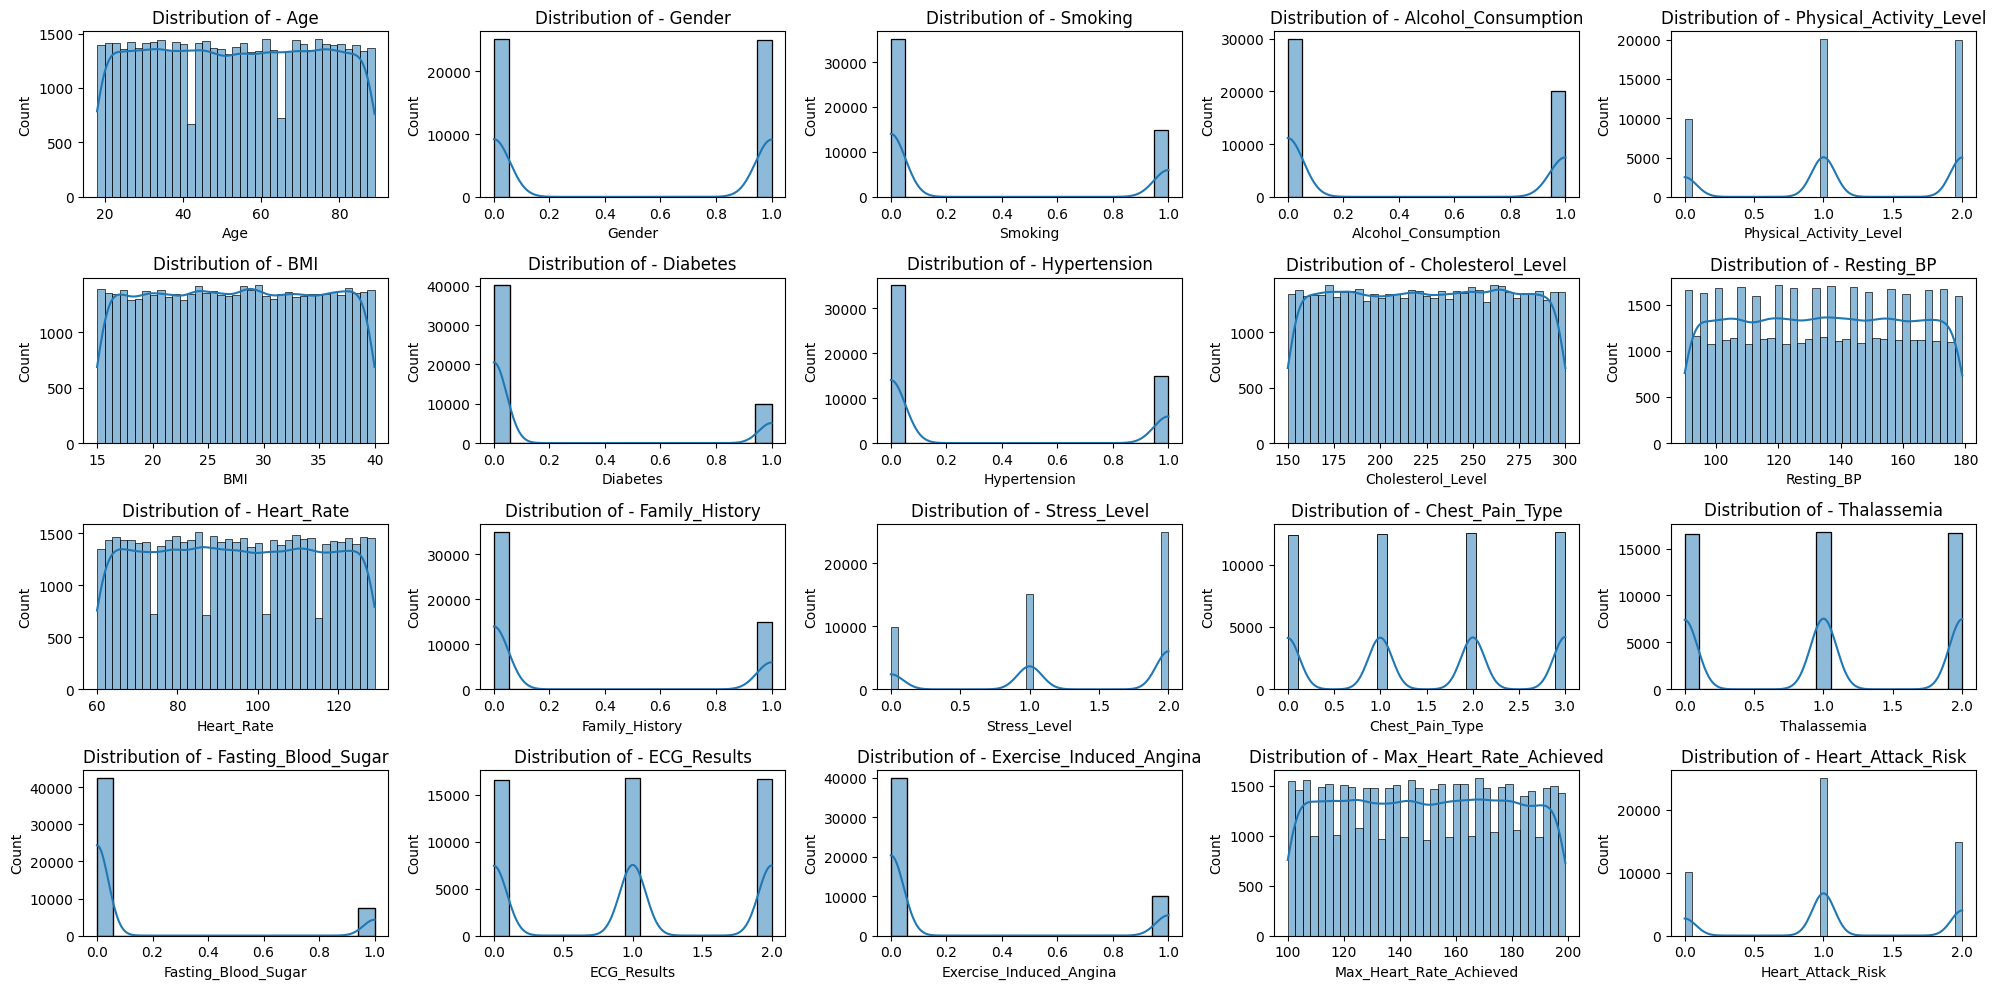

In [109]:
# Visualization of the skewness values
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(har_df.columns):
    sns.histplot(har_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of - {col}')

plt.tight_layout()
plt.show()

In [119]:
print(har_df['Diabetes'].skew())
print(har_df['Fasting_Blood_Sugar'].skew())
print(har_df['Exercise_Induced_Angina'].skew())

1.509137486916697
1.9674985888562837
1.4872908090385224


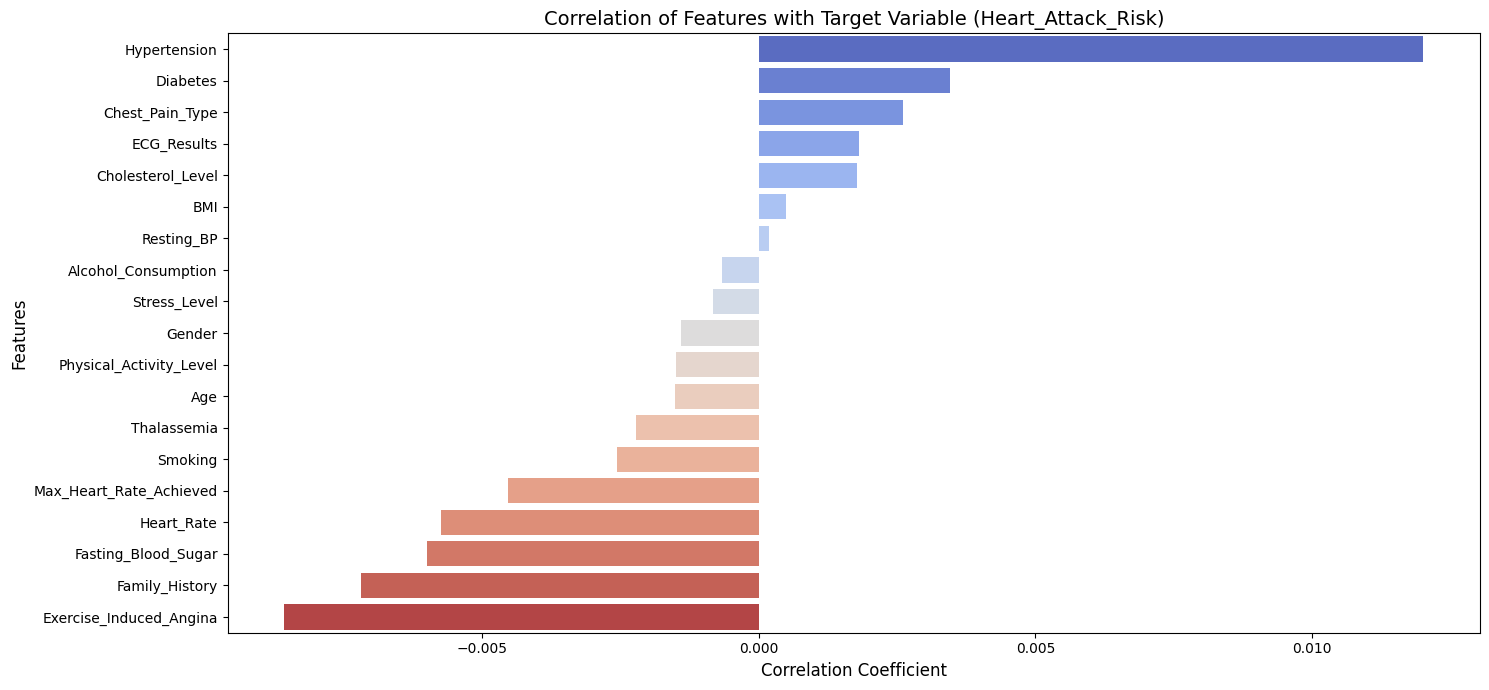

In [124]:
# Visualization of the correlation relationship between the Heart Attack Risk column (target column) and other features

correlation = har_df.corr()['Heart_Attack_Risk'].drop('Heart_Attack_Risk').sort_values(ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x=correlation.values, y=correlation.index, hue=correlation.index, palette='coolwarm')

# Grafik ayarları
plt.title('Correlation of Features with Target Variable (Heart_Attack_Risk)', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

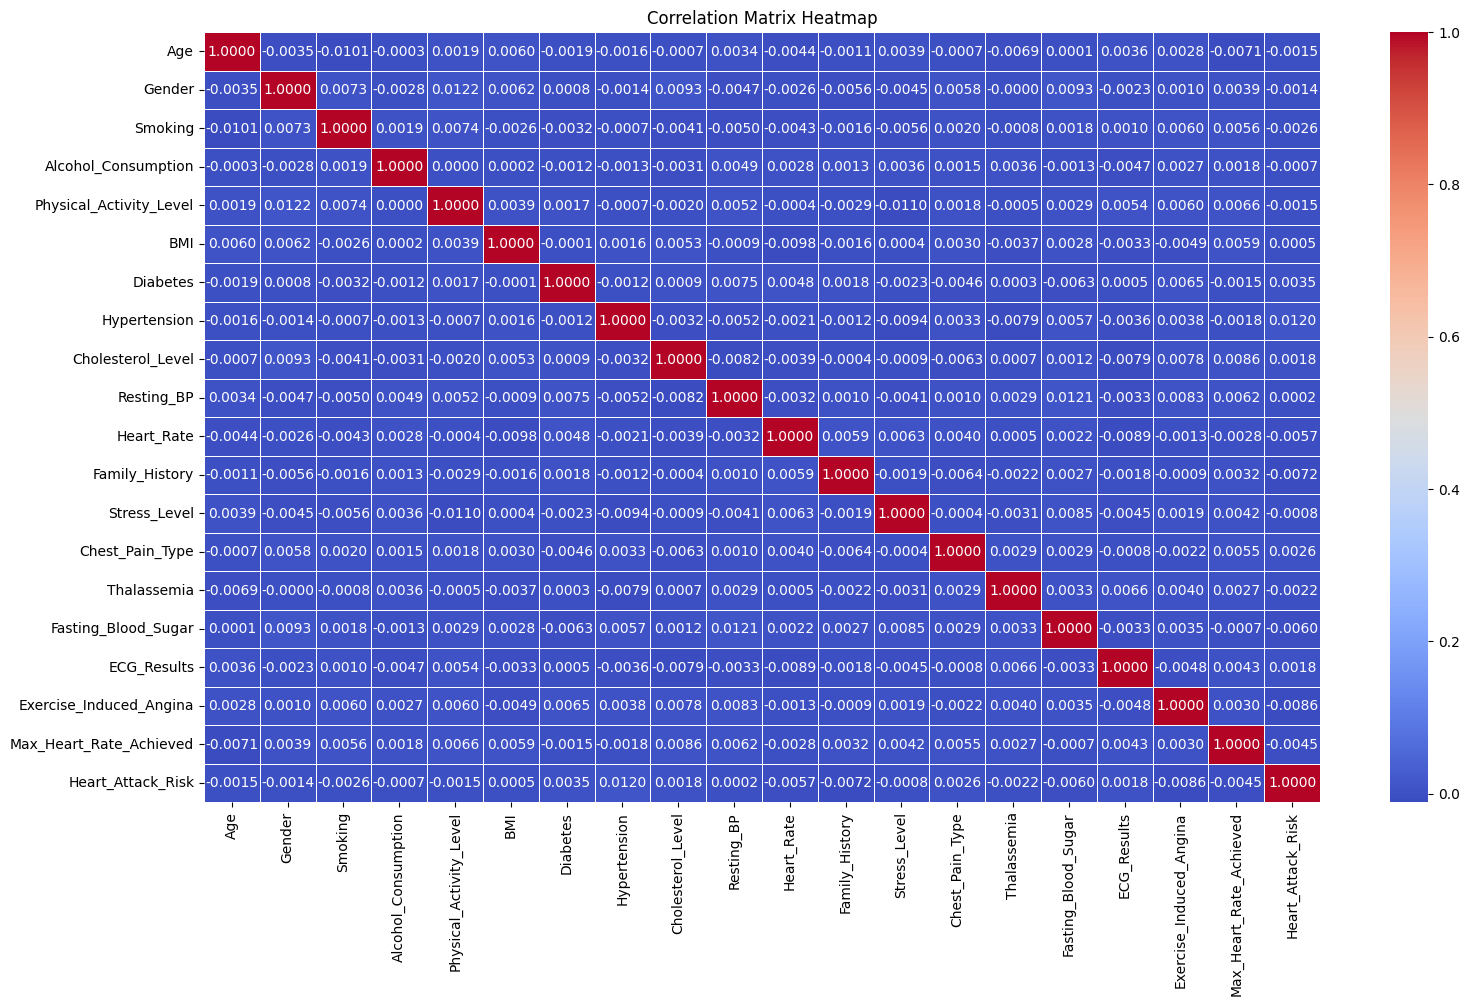

In [125]:
plt.figure(figsize=(18,10))
sns.heatmap(har_df.corr(), annot=True, fmt='.4f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

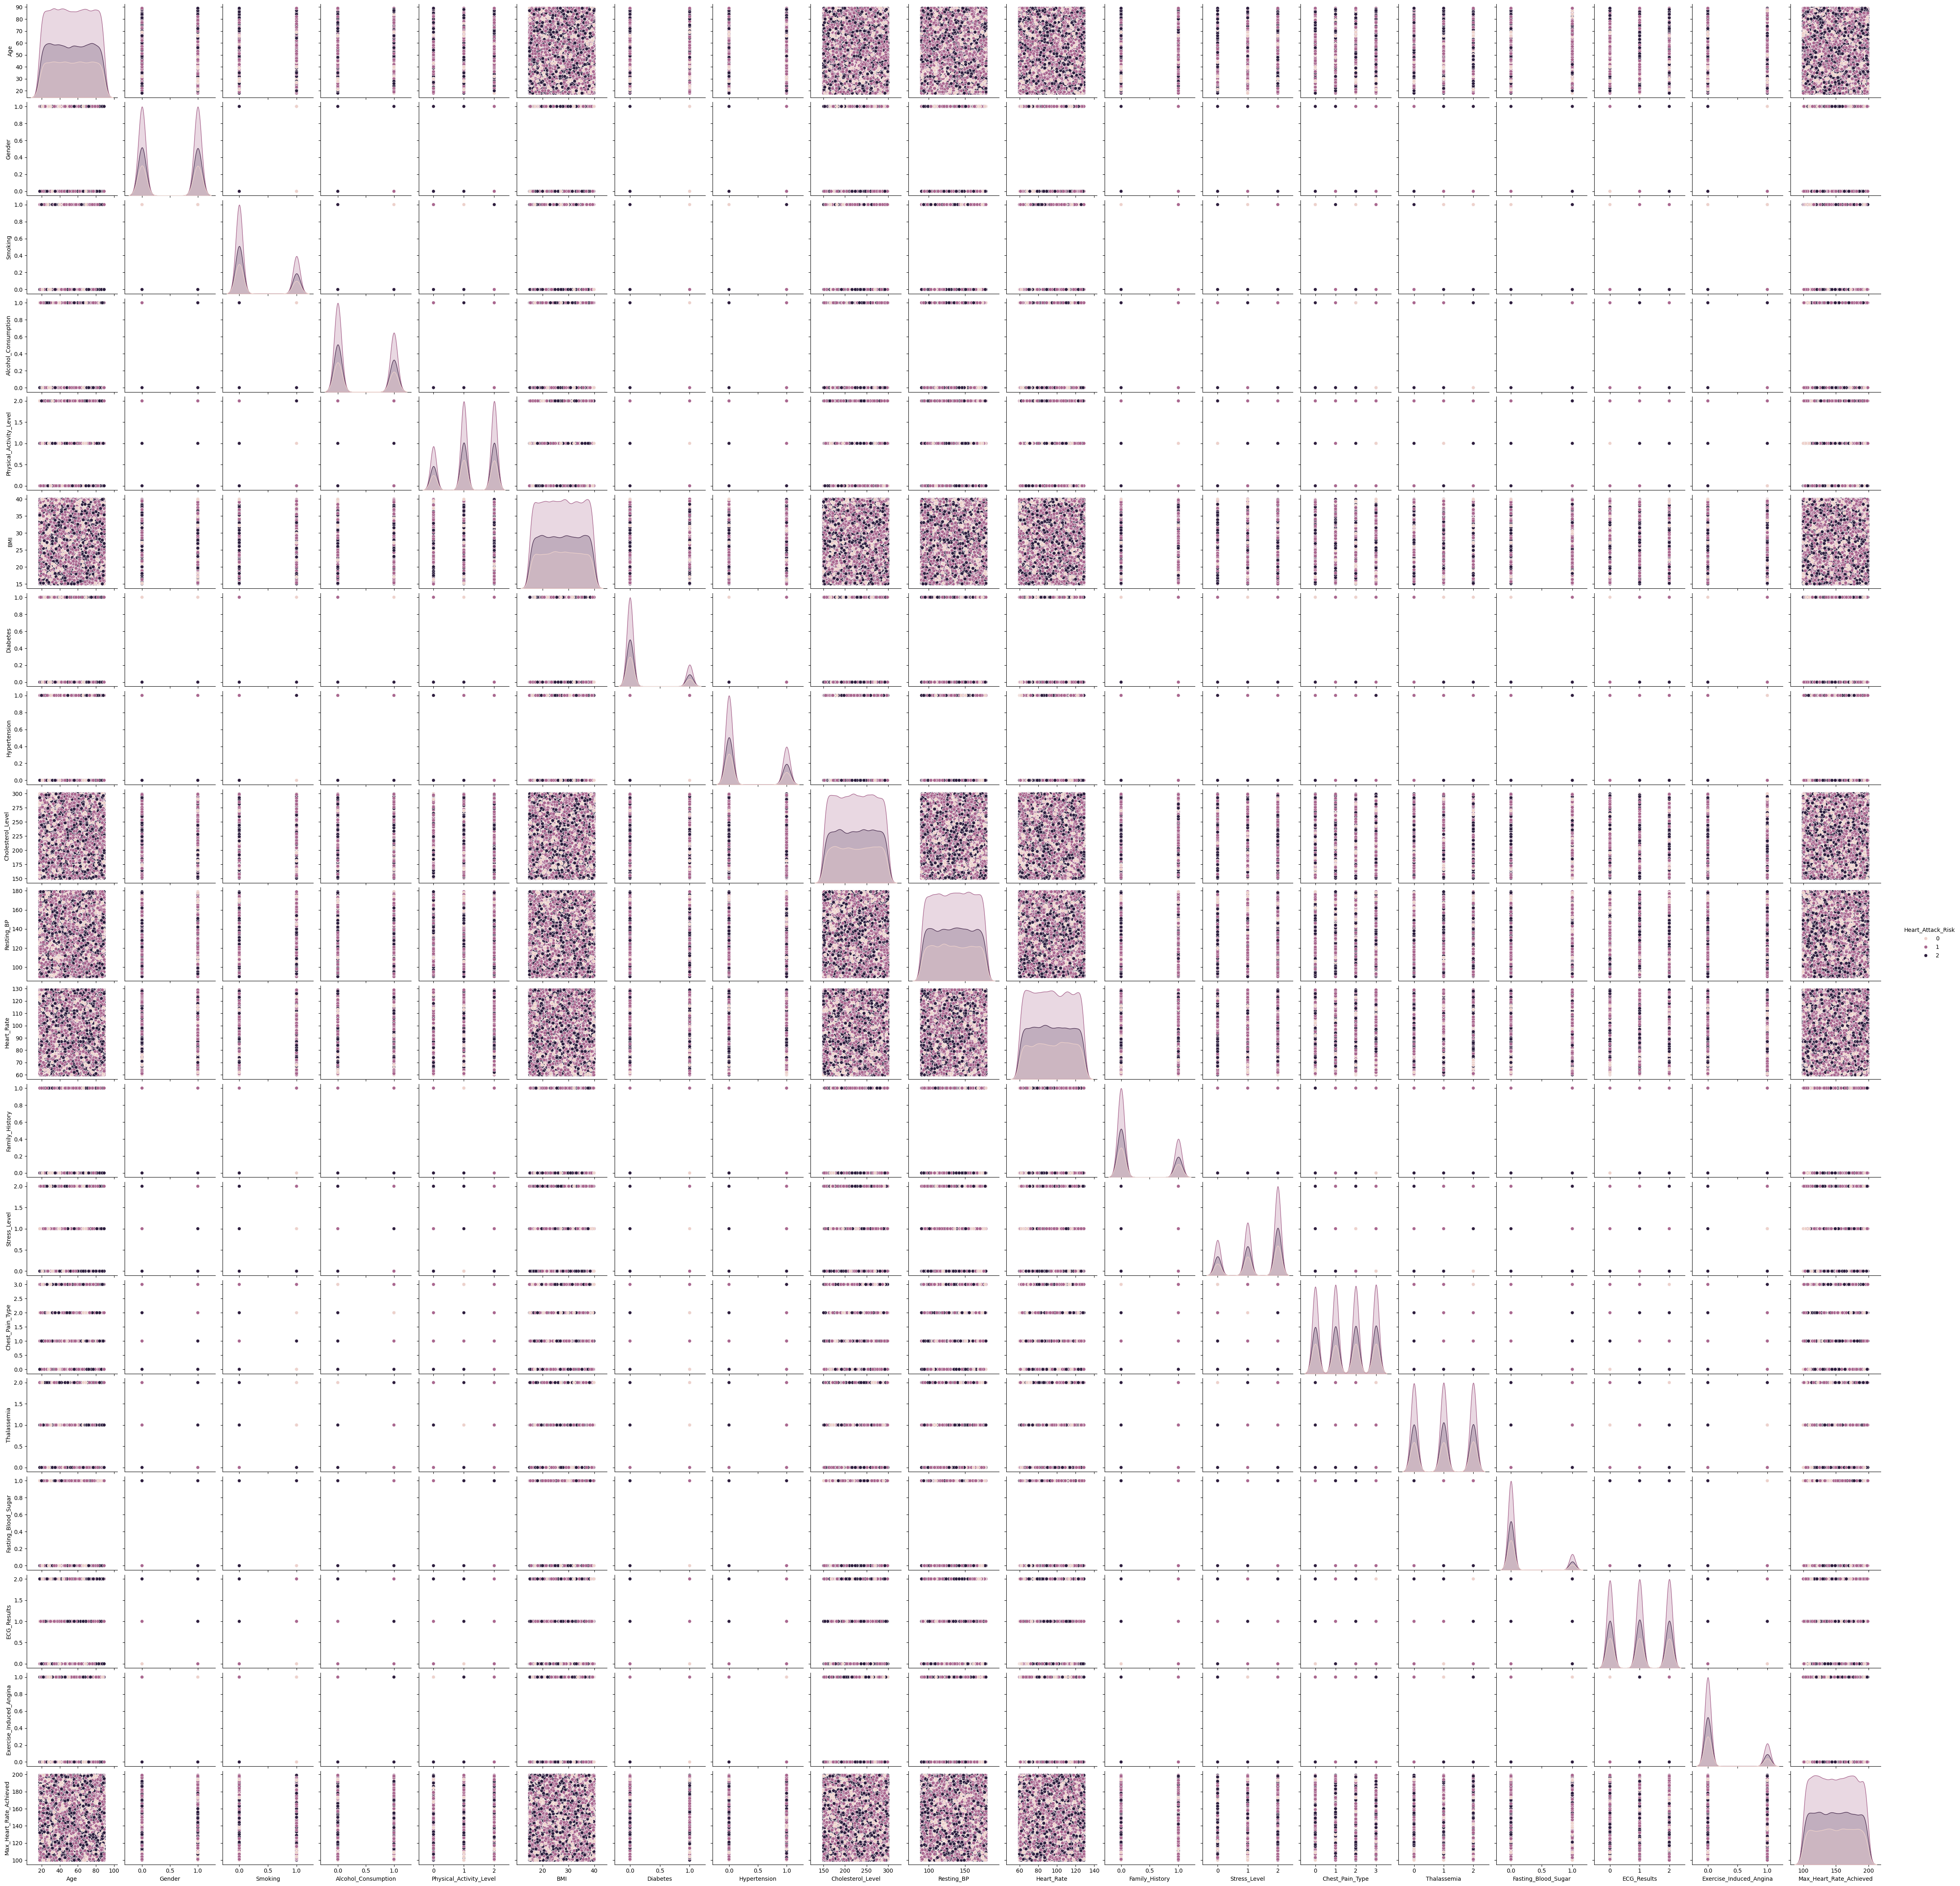

In [127]:
sns.pairplot(har_df, hue='Heart_Attack_Risk')
plt.show()

In [131]:
har_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  int32  
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  int32  
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  int32  
 13  Chest_Pain_Type          50000 non-null  int32  
 14  Thalassemia           

In [132]:
unique_counts = har_df.nunique()
unique_counts

Age                          72
Gender                        2
Smoking                       2
Alcohol_Consumption           2
Physical_Activity_Level       3
BMI                        2501
Diabetes                      2
Hypertension                  2
Cholesterol_Level          1501
Resting_BP                   90
Heart_Rate                   70
Family_History                2
Stress_Level                  3
Chest_Pain_Type               4
Thalassemia                   3
Fasting_Blood_Sugar           2
ECG_Results                   3
Exercise_Induced_Angina       2
Max_Heart_Rate_Achieved     100
Heart_Attack_Risk             3
dtype: int64

In [134]:
har_df.describe().T

count        mean        std    min     25%  \
Age                      50000.0   53.398700  20.799006   18.0   35.00   
Gender                   50000.0    0.498280   0.500002    0.0    0.00   
Smoking                  50000.0    0.298420   0.457569    0.0    0.00   
Alcohol_Consumption      50000.0    0.401980   0.490303    0.0    0.00   
Physical_Activity_Level  50000.0    1.200980   0.747260    0.0    1.00   
BMI                      50000.0   27.519357   7.225176   15.0   21.27   
Diabetes                 50000.0    0.198840   0.399131    0.0    0.00   
Hypertension             50000.0    0.297380   0.457110    0.0    0.00   
Cholesterol_Level        50000.0  225.036444  43.317373  150.0  187.30   
Resting_BP               50000.0  134.434100  25.907961   90.0  112.00   
Heart_Rate               50000.0   94.530480  20.187124   60.0   77.00   
Family_History           50000.0    0.300340   0.458410    0.0    0.00   
Stress_Level             50000.0    1.301400   0.778852    0.0    1.00   
Chest_Pain_Type          50000.0    1.508320   1.118461    0.0    1.00   
Thalassemia              50000.0    1.003180   0.814901    0.0    0.00   
Fasting_Blood_Sugar      50000.0    0.149360   0.356447    0.0    0.00   
ECG_Results              50000.0    1.001460   0.814881    0.0    0.00   
Exercise_Induced_Angina  50000.0    0.201640   0.401229    0.0    0.00   
Max_Heart_Rate_Achieved  50000.0  149.305340  28.823699  100.0  124.00   
Heart_Attack_Risk        50000.0    1.096640   0.700136    0.0    1.00   

                            50%     75%    max  
Age                       53.00   71.00   89.0  
Gender                     0.00    1.00    1.0  
Smoking                    0.00    1.00    1.0  
Alcohol_Consumption        0.00    1.00    1.0  
Physical_Activity_Level    1.00    2.00    2.0  
BMI                       27.54   33.77   40.0  
Diabetes                   0.00    0.00    1.0  
Hypertension               0.00    1.00    1.0  
Cholesterol_Level        225.10  262.60  300.0  
Resting_BP               134.00  157.00  179.0  
Heart_Rate                94.00  112.00  129.0  
Family_History             0.00    1.00    1.0  
Stress_Level               1.00    2.00    2.0  
Chest_Pain_Type            2.00    3.00    3.0  
Thalassemia                1.00    2.00    2.0  
Fasting_Blood_Sugar        0.00    0.00    1.0  
ECG_Results                1.00    2.00    2.0  
Exercise_Induced_Angina    0.00    0.00    1.0  
Max_Heart_Rate_Achieved  149.00  174.00  199.0  
Heart_Attack_Risk          1.00    2.00    2.0

# 3 - Model Creation and Training

- Four classification models were selected to address the imbalanced classification issue in the dataset. All of these classification models were tested using multiple parameters with *Grid SearchCV* to find the best fit for the dataset, and the best results obtained were used (only Randomized Search was used for the LGBM model!). Finally, a stacking model was created using the four models developed (in fact, five models were developed)

- These models were selected considering the parameters and variables that could potentially lead to overfitting and underfitting.

- To form an understanding and get a clear view of each model's performance, the *classification_report()* from the metrics module of the sklearn library was used to evaluate the performance of each model.

- Models:
    - Logistic Regression
    - Random Forest
    - XGBoost
    - LGBM
    - Stacking Model

- Finally, a Stacking Model was created with all these built models, and they were compared based on their performance to identify the model that gave the best results.

- The `f1_macro` was used in the scoring parameter of Grid SearchCV because the Target Column is imbalanced. It calculates the F1 score for each class and takes their average. This way, it treats each class as having equal weight and is unaffected by the unequal distribution of imbalanced classes. (The 'f1_weighted' option could also be used as an alternative.)

- The best parameters of the models developed by Grid SearchCV were observed with *best_params_*.
- The best scores of the models developed by Grid SearchCV were observed with *best_score_*.
- The best estimators of the models developed by Grid SearchCV were observed with *best_estimator_*.




**Logistic Regression with Grid SearchCV**

- *class_weight='balanced'* and *None* were used for class distribution.
- *Solver types* that perform well on large datasets were selected.
- The *C* parameter was chosen with gradually increasing values to provide optimal results.
- The developed Logistic Regression model did not provide very good results.


 **Random Forest with Grid SearchCV**

- Class distribution was set using *class_weight='balanced'* and *None*.
- The number of trees used in the model was specified with *n_estimators*.
- The maximum depth of each tree was defined using *max_depth*.
- The minimum number of samples required to split a node was set using *min_samples_split*.
- The splitting criteria were defined using *criterion*. (*gini*, *entropy*)
- The developed Random Forest model gave better results compared to the previous model. However, it still didn't provide satisfactory results.


 **XGBoost with Grid SearchCV**

- The number of trees to be used in the model was specified with *n_estimators*.
- The maximum depth each tree can grow to was specified with *max_depth*.
- The learning rates to be used in the model were specified with *learning_rate*.
- The proportion of samples used for training each tree was specified with *subsample*.
- The regularization rate was specified with *gamma*.
- The developed XGBoost model performed better compared to the previous models.


 **LGBM with Randomized SearchCV**

- *num_leaves* parameter specifies the maximum number of leaves in each tree (this parameter was set using an array created with numpy).
- *max_depth* defines how deep each tree can grow.
- *learning_rate* defines the learning rates used in the model.
- *n_estimators* specifies the number of trees to be used in the model.
- *boosting_type* specifies the boosting method used for LGBM (gbdt -> Gradient Boosting Decision Tree, dart -> Dropouts Multiple Additive Regression Trees).
- *subsample* defines the fraction of samples used for training each tree.
- *colsample_bytree* specifies the fraction of features used for constructing each tree in LGBM.
- The developed LGBM model performed better compared to the previous models.


 **Stacking Model**

- Finally, a Stacking Model is created using the previously built models.
- The base models used are -> Logistic Regression, Random Forest, XGBoost and LGBM.
- The meta model used is -> Logistic Regression.
- The reason Logistic Regression is used as the meta model is that, despite using more complex models, the performance did not visibly improve, and in fact, the performance decreased. Therefore, Logistic Regression, which showed the best meta model performance, is used..!
- The developed Stacking Model provided better results compared to the previous models.

In [136]:
X = har_df.drop(columns=['Heart_Attack_Risk']).values
X

y = har_df['Heart_Attack_Risk'].values
y

print(f'Target column class distribution -> {Counter(y)}')

Target column class distribution -> Counter({1: 25024, 2: 14904, 0: 10072})


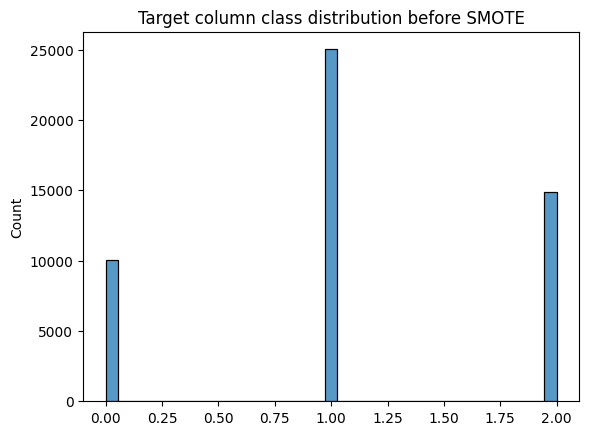

In [146]:
sns.histplot(x=y)
plt.title('Target column class distribution before SMOTE')
plt.show()

In [147]:
# StratifiedShuffleSplit
ss_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in ss_split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Target column class distribution after SMOTE -> {Counter(y_train_smote)}')

# MinMax Scaling
minmax = MinMaxScaler()
X_train_smote_minmax = minmax.fit_transform(X_train_smote)
X_test_minmax = minmax.transform(X_test)

Target column class distribution after SMOTE -> Counter({0: 20019, 2: 20019, 1: 20019})


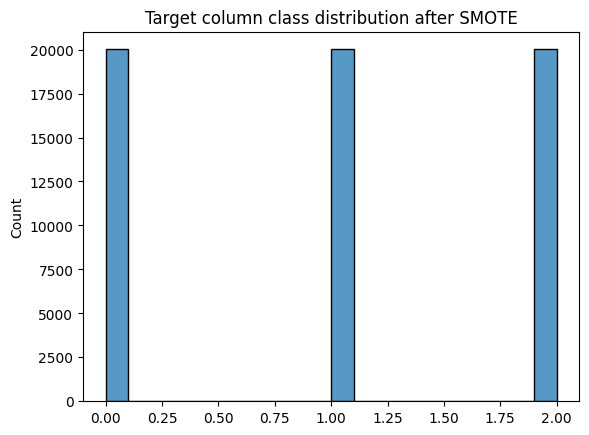

In [148]:
sns.histplot(x=y_train_smote)
plt.title('Target column class distribution after SMOTE')
plt.show()

In [149]:
# Logistic Regression with grid search
params_grid_log_reg = {'class_weight': ['balanced', None],
                       'solver': ['lbfgs', 'newton-cg', 'saga'],
                       'C': [0.01, 0.1, 1, 10]}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_gr = GridSearchCV(estimator=log_reg, param_grid=params_grid_log_reg, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
log_reg_gr.fit(X_train_smote_minmax, y_train_smote)

print(f'Logistic Regression Best Score = {log_reg_gr.best_score_}\n')
print(f'Logistic Regression Best Params = {log_reg_gr.best_params_}\n')
print(f'Logistic Regression Best Estimator = {log_reg_gr.best_estimator_}\n')

log_reg_gr_pred = log_reg_gr.best_estimator_.predict(X_test_minmax)
print(f'Logistic Regression classification report\n {classification_report(y_test, log_reg_gr_pred)}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Logistic Regression Best Score = 0.3424139675874231

Logistic Regression Best Params = {'C': 10, 'class_weight': 'balanced', 'solver': 'newton-cg'}

Logistic Regression Best Estimator = LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='newton-cg')

Logistic Regression classification report
               precision    recall  f1-score   support

           0       0.19      0.35      0.25      2014
           1       0.49      0.26      0.34      5005
           2       0.29      0.36      0.32      2981

    accuracy                           0.31     10000
   macro avg       0.32      0.32      0.30     10000
weighted avg       0.37      0.31      0.32     10000



In [150]:
# Random Forest with grid search
params_grid_rf = {'class_weight': ['balanced', None],
                  'n_estimators': [100, 300, 500],
                  'max_depth': [1, 3, 5],
                  'min_samples_split': [2, 5],
                  'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier(random_state=42)
rf_gr = GridSearchCV(estimator=rf, param_grid=params_grid_rf, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
rf_gr.fit(X_train_smote_minmax, y_train_smote)

print(f'Random Forest Best Score = {rf_gr.best_score_}\n')
print(f'Random Forest Best Params = {rf_gr.best_params_}\n')
print(f'Random Forest Best Estimator = {rf_gr.best_estimator_}\n')

rf_gr_pred = rf_gr.best_estimator_.predict(X_test_minmax)

print(f'Random Forest classification report\n {classification_report(y_test, rf_gr_pred)}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Best Score = 0.3831302533377362

Random Forest Best Params = {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500}

Random Forest Best Estimator = RandomForestClassifier(max_depth=3, n_estimators=500, random_state=42)

Random Forest classification report
               precision    recall  f1-score   support

           0       0.19      0.06      0.10      2014
           1       0.50      0.93      0.65      5005
           2       0.43      0.01      0.03      2981

    accuracy                           0.48     10000
   macro avg       0.37      0.33      0.26     10000
weighted avg       0.42      0.48      0.35     10000



In [151]:
# XGBoost with grid search
params_grid_xgb = {'n_estimators': [100, 300, 600],
                   'max_depth': [1, 3, 5],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'subsample': [0.7, 0.8, 1.0],
                   'gamma': [0, 0.1]}

xgb_model = XGBClassifier(random_state=42)
xgb_model_gr = GridSearchCV(estimator=xgb_model, param_grid=params_grid_xgb, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
xgb_model_gr.fit(X_train_smote_minmax, y_train_smote)

print(f'XGB Model Best Score = {xgb_model_gr.best_score_}\n')
print(f'XGB Model Best Params = {xgb_model_gr.best_params_}\n')
print(f'XGB Model Best Estimator = {xgb_model_gr.best_estimator_}\n')

xgb_model_gr_pred = xgb_model_gr.best_estimator_.predict(X_test_minmax)

print(f'XGBoost classification report\n {classification_report(y_test, xgb_model_gr_pred)}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
XGB Model Best Score = 0.4389792222306407

XGB Model Best Params = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 600, 'subsample': 0.7}

XGB Model Best Estimator = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob'

In [154]:
# LGBM with randomized search
param_dist_lgbm = {'num_leaves': np.arange(20, 150, 10),
                    'max_depth': [-1, 5, 10, 20],
                    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                    'n_estimators': [50, 100, 200, 500],
                    'boosting_type': ['gbdt', 'dart'],
                    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
                    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]}

lgbm = LGBMClassifier(random_state=42)
lgbm_model_gr = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist_lgbm, n_iter=50, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
lgbm_model_gr.fit(X_train_smote_minmax, y_train_smote)

print(f'LGBM Model Best Score = {lgbm_model_gr.best_score_}\n')
print(f'LGBM Model Best Params = {lgbm_model_gr.best_params_}\n')
print(f'LGBM Model Best Estimator = {lgbm_model_gr.best_estimator_}\n')

y_pred_lgbm = lgbm_model_gr.best_estimator_.predict(X_test_minmax)
print(f'LGBM classification report\n {classification_report(y_test, y_pred_lgbm)}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60057, number of used features: 19
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LGBM Model Best Score = 0.5246587014952261

LGBM Model Best Params = {'subsample': 0.9, 'num_leaves': 90, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0, 'boosting_type': 'gbdt'}

LGBM Model Best Estimator = LGBMClassifier(learning_rate=0.2, max_depth=10, n_estimators=500, num_leaves=90,
               random_state=42, subsample=0.9)

LGBM classification report
               precision    recall  f1-score   support

           0       0.22      0

In [158]:
# Stacking model with the models (log_reg_gr, rf_gr, xgb_model_gr, lgbm_model_gr)

base_models = [
    ('log_reg', log_reg_gr.best_estimator_),
    ('rf', rf_gr.best_estimator_),
    ('xgb_model', xgb_model_gr.best_estimator_),
    ('lgbm_model', lgbm_model_gr.best_estimator_)
]

meta_model = LogisticRegression(class_weight='balanced', max_iter=1000)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1, verbose=1, cv=5)
stacking_model.fit(X_train_smote_minmax, y_train_smote)
stacking_model_pred = stacking_model.predict(X_test_minmax)

print(f'Stacking Model Classification Report ->\n {classification_report(y_test, stacking_model_pred)}')

Stacking Model Classification Report ->
               precision    recall  f1-score   support

           0       0.21      0.10      0.14      2014
           1       0.50      0.78      0.61      5005
           2       0.30      0.11      0.16      2981

    accuracy                           0.45     10000
   macro avg       0.34      0.33      0.30     10000
weighted avg       0.38      0.45      0.38     10000



# 4 - Model Evaluation and Comparison

- All the created models were evaluated using Stratified K-Fold cross-validation to calculate their F1-macro scores. The results were compared, and the best model was determined through visual analysis.
- 5-fold Cross Validation was applied to each of the models.
- As seen in the graph, the best model was determined to be the Stacking Model.
- The performance ranking of the models, with a more detailed analysis and visualization, is shown below:
- -> The model with the best performance is the Stacking Model.

- To make the performance of these models more easily visible, they are converted into a dataframe.

- The classification_report of the best model, the Stacking Model, is generated to examine the classification values, and it is visualized using a Confusion Matrix.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
log_reg_gr - Cross Validation F1 Scores: [0.33505468 0.34319826 0.34116129 0.34137367 0.33955651]
log_reg_gr - Average F1 Scores: 0.34006888521739836

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
rf_gr - Cross Validation F1 Scores: [0.41421796 0.41165034 0.40884915 0.40835748 0.42367099]
rf_gr - Average F1 Scores: 0.41334918399848997

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each 

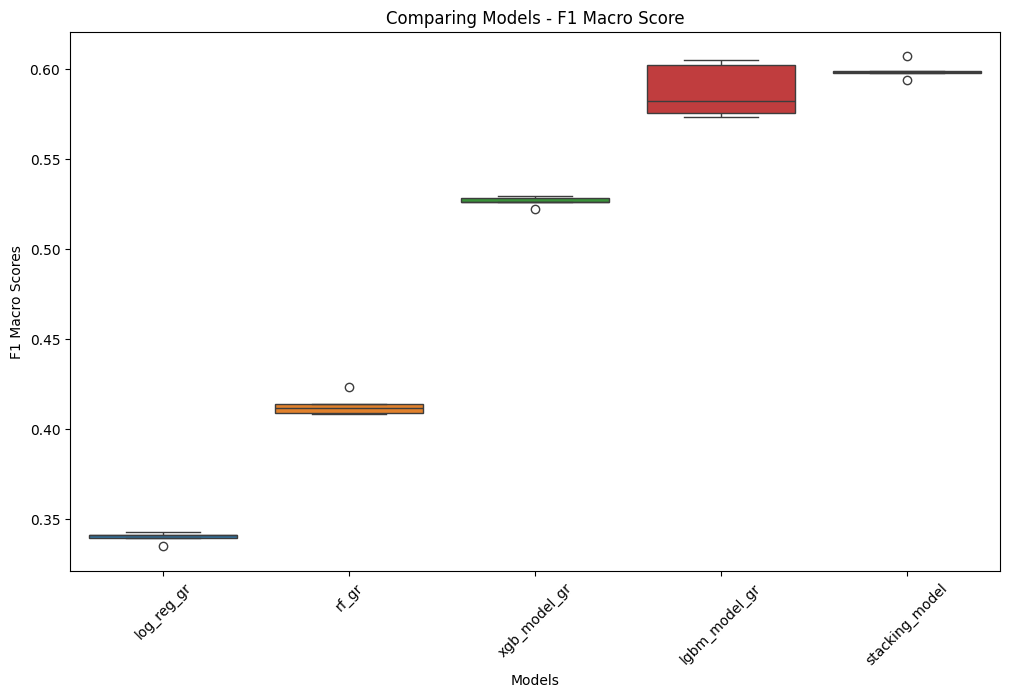

In [162]:
# Burada bütün modelleri StratifiedKFold ile F1-macro skorlarını hesaplayıp karşılaştırarak görsel analiz şeklinde en iyi modeli belirleme  # Burada 5 katmanlı Cross Validation uyguladım.  (En iyi model Stacking Model..!)
models = {'log_reg_gr': log_reg_gr,
          'rf_gr': rf_gr,
          'xgb_model_gr': xgb_model_gr,
          'lgbm_model_gr': lgbm_model_gr,
          'stacking_model': stacking_model}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

models_scores = {}

for i, j in models.items():
    scores = cross_val_score(j, X_train_smote_minmax, y_train_smote, cv=cv, scoring=scorer)
    models_scores[i] = scores
    print(f'{i} - Cross Validation F1 Scores: {scores}')
    print(f'{i} - Average F1 Scores: {np.mean(scores)}\n')

models_scores_df = pd.DataFrame(models_scores)

plt.figure(figsize=(12, 7))
sns.boxplot(data=models_scores_df)
plt.xlabel('Models')
plt.ylabel('F1 Macro Scores')
plt.title('Comparing Models - F1 Macro Score')
plt.xticks(rotation=45)
plt.show()

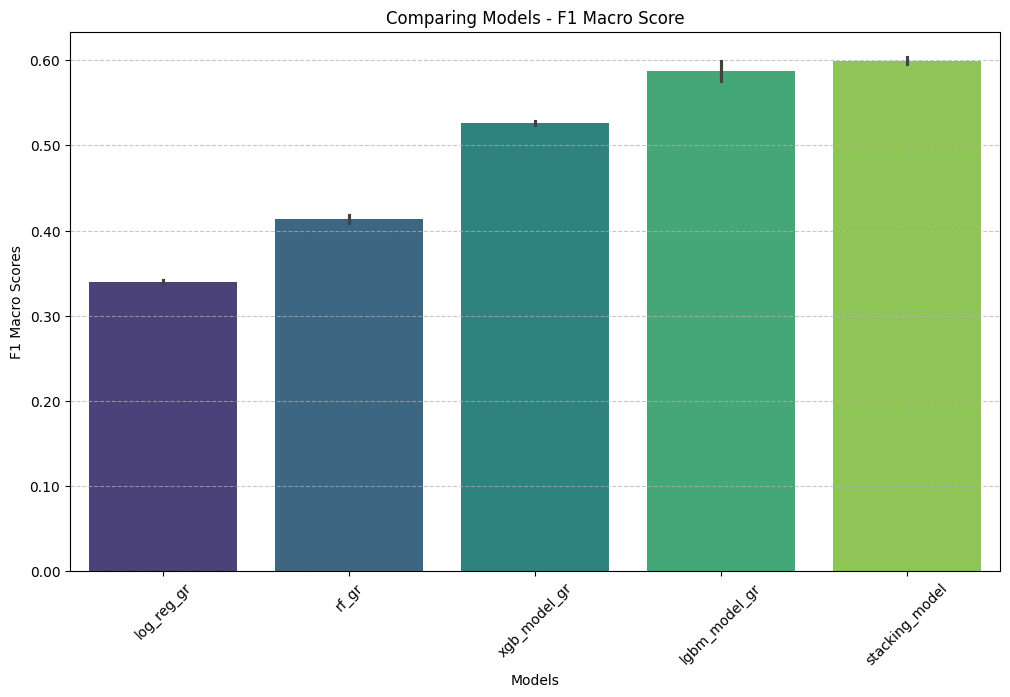

In [189]:
plt.figure(figsize=(12, 7)) # En iyi model Stacking Model
sns.barplot(data=models_scores_df, palette='viridis')
plt.xlabel('Models')
plt.ylabel('F1 Macro Scores')
plt.title('Comparing Models - F1 Macro Score')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f')) # y ekseni için ondalıklı gösterim
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [183]:
models_scores_df # Best model Stacking Model

log_reg_gr     rf_gr  xgb_model_gr  lgbm_model_gr  stacking_model
0    0.335055  0.414218      0.526296       0.575568        0.598231
1    0.343198  0.411650      0.521991       0.582004        0.593871
2    0.341161  0.408849      0.526129       0.602044        0.597442
3    0.341374  0.408357      0.529471       0.604675        0.606882
4    0.339557  0.423671      0.528368       0.573259        0.598778

In [204]:
print(f'Best Stacking Model Average\n {models_scores_df['stacking_model'].mean()}') # En iyi model olan Stacking Model'in Ortalaması

Best Stacking Model Average
 0.5990405462311553


In [177]:
# Performans Analizi ve Görselleştirme

Stacking Model Classification Report
               precision    recall  f1-score   support

           0       0.21      0.10      0.14      2014
           1       0.50      0.78      0.61      5005
           2       0.30      0.11      0.16      2981

    accuracy                           0.45     10000
   macro avg       0.34      0.33      0.30     10000
weighted avg       0.38      0.45      0.38     10000

Stacking Model Confusion Matrix:
 [[ 211 1587  216]
 [ 512 3927  566]
 [ 276 2371  334]]


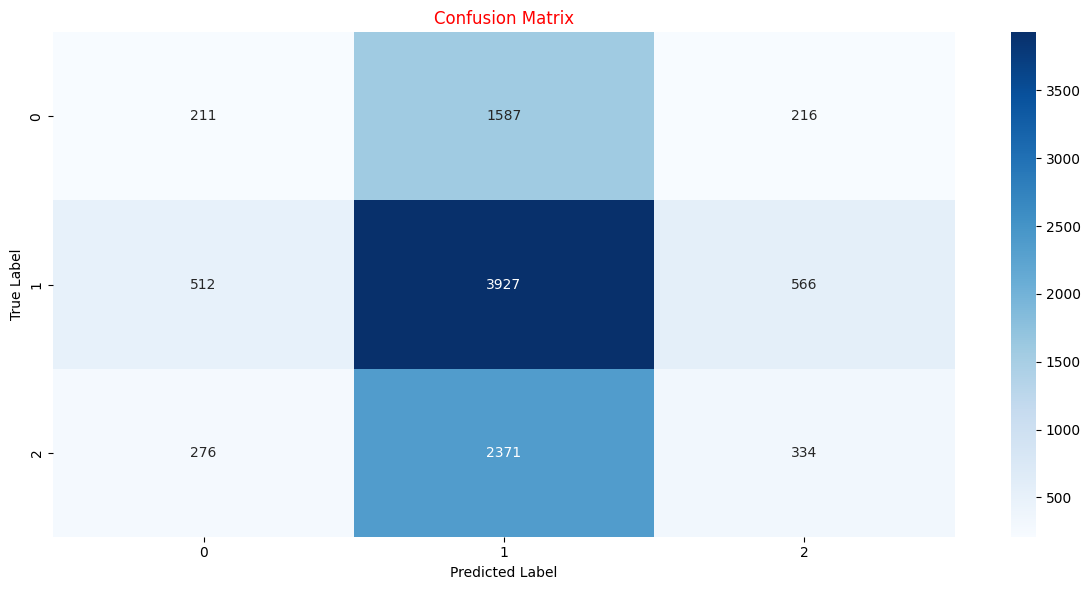

In [232]:
# Stacking Model'in analiz ve görselleştirilmesi (En iyi modelin)
# classification report
print(f'Stacking Model Classification Report\n {classification_report(y_test, stacking_model_pred)}')

# confusion matrix
cm = confusion_matrix(y_test, stacking_model_pred)
print(f'Stacking Model Confusion Matrix:\n {cm}')

# confusion matrix görselleştirme
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', c='r')
plt.tight_layout()
plt.show()

# 5 - Model Interpretability

- Model interpretability is crucial for understanding and examining projects with imbalanced datasets and where important decisions are made. In this section, Feature Importance, SHAP, and PDPs methods were used to interpret the models. Additionally, for Logistic Regression, the coefficients can be viewed using *coef_* which allows for observing the effect of each feature on the target variable.

`1. Logistic Regression Model Interpretation ->`
Logistic Regression is a simple and interpretable model. The model's coefficients show the effect of each feature on the target variable. Positive coefficients lead to an increase in the target variable, while negative coefficients lead to a decrease.   The significance of the coefficients can be examined through their p-values. Additionally, by using *class_weight='balanced'* it is possible to see how the model handles imbalanced classes.

`2. Random Forest Model Interpretation ->`
Random Forest, as a combination of trees, makes it more difficult to interpret individual decisions. However, by using the *feature_importances_* parameter we can determine which features are more important.
The importance of features indicates how much they contribute to the model's predictions. The depth of the trees also provides insight into how the model makes decisions and the potential risk of overfitting. Additionally, as parameters like *n_estimators* are increased, the model's generalization ability can improve. The key point to consider is that if the n_estimators parameter is not adjusted properly, the risk of overfitting becomes inevitable. 

`3. XGBoost Model Interpretation ->`
Since XGBoost is a tree-based model, the model’s outputs and parameter settings are important for understanding which features are influential. Using *feature_importance()* we can identify which features are significant.
Additionally, methods like SHAP (Shapley Additive Explanations) and LIME (Local Interpretable Model-agnostic Explanations) can further clarify the model’s decisions. These techniques help in understanding the reasons behind the model’s predictions.

`4. LGBM Model Interpretation ->`
LGBM, being based on gradient boosting techniques, can make model interpretation more challenging. However, we can still assess which features are more influential by using *feature_importance()*.
Parameters such as *booster_type*, *subsample*, and *colsample_bytree* significantly impact the overall performance and interpretability of the LGBM model. These parameters play a crucial role in determining how well the model generalizes and its effectiveness in making predictions.

`5. Stacking Model Interpretation ->`
The interpretability of the Stacking model is similar to the interpretability of individual models. However, the decisions made by the base models are combined the meta model. `The most crucial aspect here is understanding the behavior of the meta model.!`
The reason for the better performance of the Logistic Regression meta model is that it simplifies the inferences of the more complex models into a simpler structure and evaluates the information obtained from the base models using optimal parameters.

**`Summary`**
`Feature İmportance ->` Models like Random Forest and XGBoost can be analyzed using *feature_importance_* to show which features are more influential on predictions.
`SHAP ve LIME ->` Using these models, deeper model interpretability can be achieved.

- **Feature İmportance**

-  Here, Feature Importance was used as the model interpretability technique for tree-based models (Random Forest, XGBoost, LGBM) and Stacking Base Models.

- **SHAP (Shapley Additive Explanations)**

- By using the SHAP method, the tree-based models in the Stacking Models, such as Random Forest, XGBoost, and LGBM, are interpreted.

- `Random Forest SHAP`

- `XGBoost SHAP`

- `LGBM SHAP`

- **PDPs (Partial Dependence Plots)**

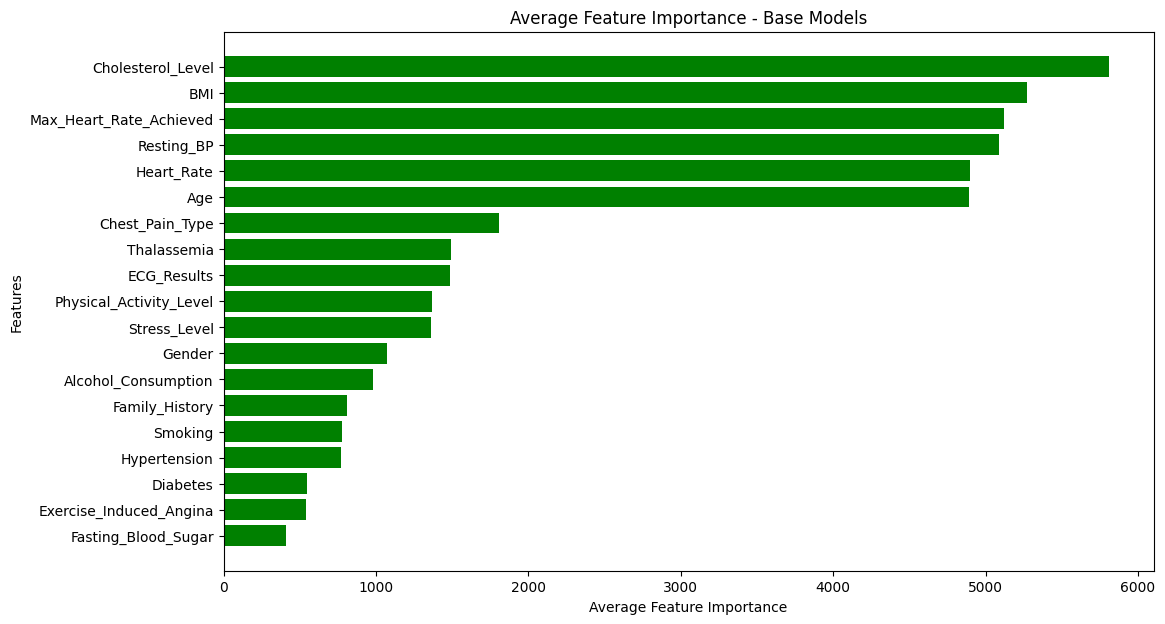

In [234]:
# Feature Importance Graph (only tree structures)

feature_names = har_df[['Age', 'Gender', 'Smoking', 'Alcohol_Consumption', # I collected the feature names in a list to display them in the graph
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']].columns.tolist()

rf_importance = rf_gr.best_estimator_.feature_importances_
xgb_importance = xgb_model_gr.best_estimator_.feature_importances_
lgbm_importance = lgbm_model_gr.best_estimator_.feature_importances_

avg_importance = (rf_importance + xgb_importance + lgbm_importance) / 3 # average

feature_importance_avg = pd.DataFrame(
    {'Feature': feature_names, 'Importance': avg_importance}
)

feature_importance_avg = feature_importance_avg.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
plt.barh(feature_importance_avg['Feature'], feature_importance_avg['Importance'], color='green')
plt.xlabel("Average Feature Importance")
plt.ylabel("Features")
plt.title("Average Feature Importance - Base Models")
plt.gca().invert_yaxis()
plt.show()

In [1]:
# Model interpretability with SHAP (Stacking Model) (In the basic model, I only interpret tree-based ones with shap)

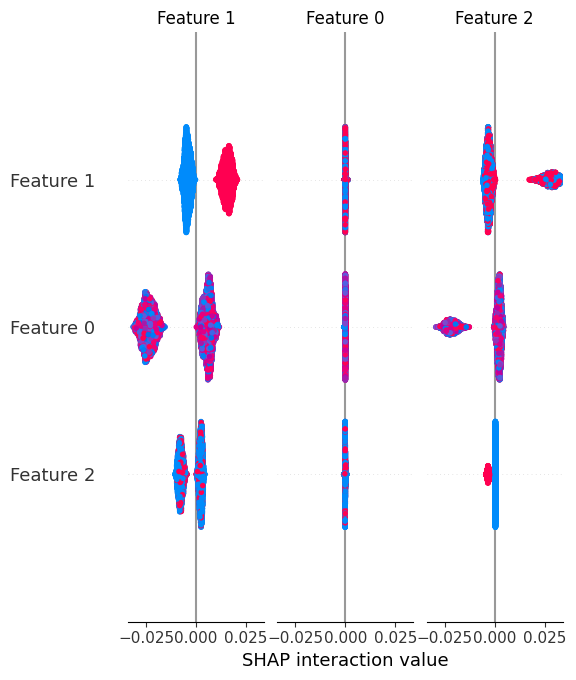

In [218]:
# random forest
rf_shap = shap.Explainer(rf_gr.best_estimator_)
rf_shap_values = rf_shap(X_test_minmax)

shap.summary_plot(rf_shap_values, X_test_minmax)

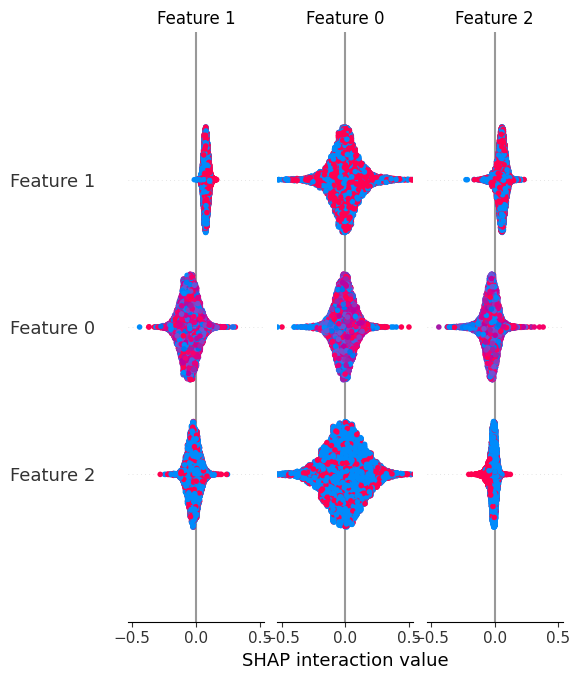

In [216]:
# xgb
xgb_shap = shap.Explainer(xgb_model_gr.best_estimator_)  
xgb_shap_values = xgb_shap(X_test_minmax)

shap.summary_plot(xgb_shap_values, X_test_minmax)

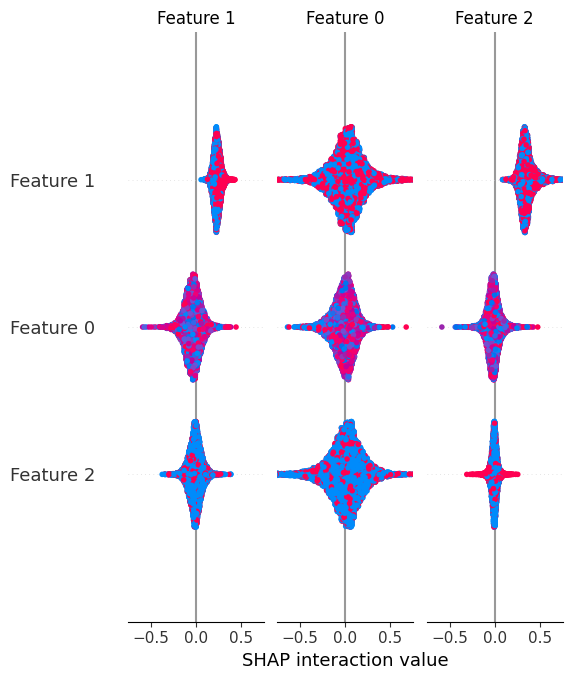

In [217]:
# lgbm
lgbm_shap = shap.Explainer(random_search.best_estimator_)
lgbm_shap_values = lgbm_shap(X_test_minmax)

shap.summary_plot(lgbm_shap_values, X_test_minmax)

In [1]:
# Interpretability of the Stacking Model using PDPs (Partial Dependence Plots)

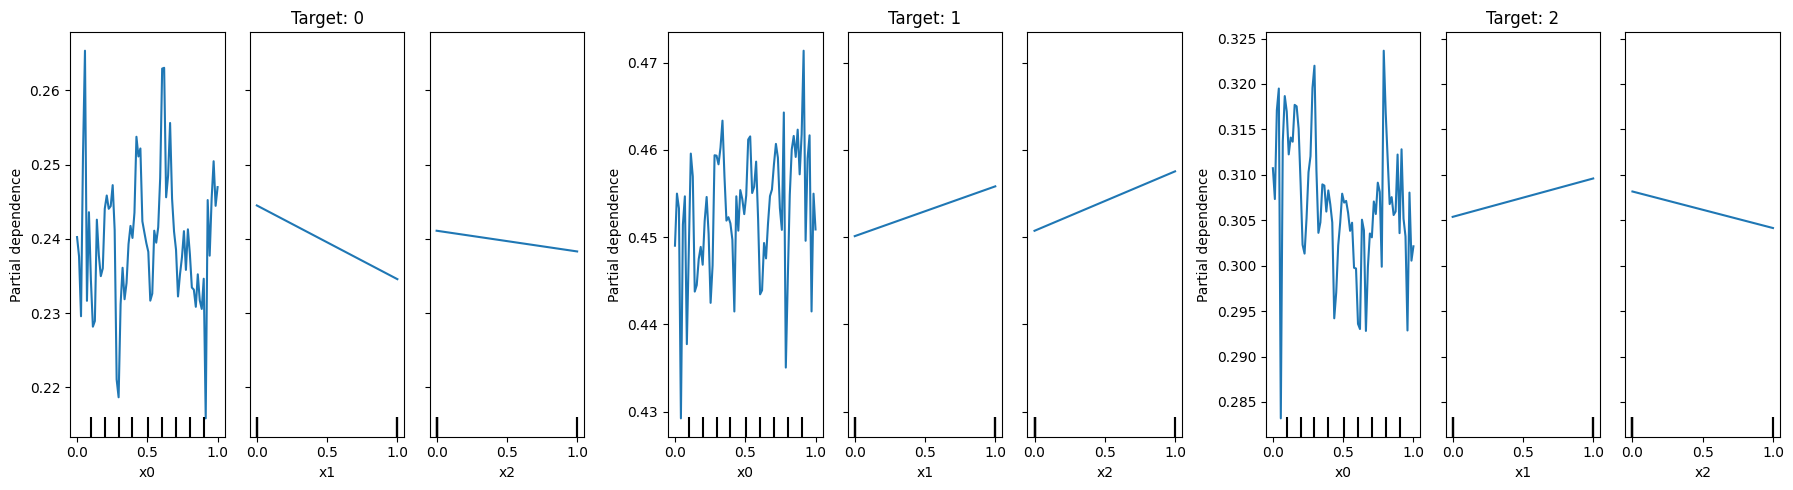

In [238]:
# I have selected the first 3 features (other features can be selected optionally)
features = [0, 1, 2]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, target_class in enumerate([0, 1, 2]):
    display = PartialDependenceDisplay.from_estimator(
        stacking_model, 
        X_test_minmax, 
        features=features,
        target=target_class,
        ax=axes[i]  # Different subplot for each class
    )
    axes[i].set_title(f"Target: {target_class}")

plt.tight_layout()
plt.show()


# 6 - Results and Recommendations

**Results**

Model Performance:
- `Stacking Model` It achieved the highest performance. The Stacking Model was able to make better predictions by leveraging the outputs of previous models (using the best features of the previous models).

- `LGBM` It was determined to be a high-performance model and suitable for imbalanced datasets. Additionally, it was observed that optimizing its parameters increased the model's accuracy.
- `XGBoost` and `Random Forest` models lag behind LGBM, but it is still observed that they exhibit some significant performance.
- `Logistic Regression` It was observed that the model had difficulty coping with unbalanced data and showed low performance.


**Application Area Of The Model.**

- Stacking Model and LGBM models can be recommended because they have shown high success in critical areas that take ethical values ​​into consideration, such as health and finance.
- XGBoost and Random Forest can be preferred in projects that care about the balance of speed and accuracy.

**Recommendations**

- `Increasing the Quality of the Data Set:` Some meaningless uncorrelated relationships in the data, other than the unbalanced classification, cause the features not to be able to be interpreted and inferred from each other. Therefore, determining the problem in the data set and increasing its quality can be more useful and result-oriented for both data set analyzes and model developers.

- `Improving Data Quality:` Unbalanced data can negatively affect the success of the model. Therefore, it may be useful to collect more data and use different combinations of sampling techniques (ADASYN, SMOTE, etc. synthetic sampling).

- `Hyperparameter Tuning:` Model parameters can be further optimized. In particular, more experiments can be conducted on parameters such as learning_rate, num_leaves, and max_depth. However, if the parameters are not adjusted well, the risk of overfitting or underfitting may be inevitable. To prevent this, methods such as early stopping can be used.

- `Testing New Models:` Apart from ensemble methods, it can also be tested with Deep Learning models. Deep networks in particular can give more effective results on very large data sets.

- `Monitoring and Updating the Model:` Models must be updated and retrained over time based on changing data. Therefore, it is important to retrain the model periodically.


**`General Recommendation ->`** Since the Stacking Model gives the best performance, it can be aimed to improve this model further. However, faster and simpler models can also be preferred depending on the platform and processing capacity of the model.